# Final Project: Will Kobe Make his Shot?

## Introduction

### In this project I try to predict whether or not Kobe Bryant will make a shot in a basketball game.  While Kobe does not play anymore, this is relevant for basketball in general as it can be used for other players besides Kobe.  This is be because by builiding the best model with Kobe's data, I can apply the same model to others in order to predict their shots. As I got this dataset from a contest on Kaggle, there are many other projects similar to mine on the website.

### As stated before, the dataset was obtained from Kaggle. The dataset had 30697 observations. The target variable is shot_made_flag, which indicates whether or not a shot went in.  Additionally, there are 24 other input variables used to predict shot_made_flag. Below the variables are listed alongside their description. Additionally, i created a new variable called Home/Away that I got from the info in the matchup variable.

#### action_type, action taken to shoot (character)
#### combined_shot_type, tpye of shot (character)
#### game_event_id, id of specific event in the game (numeric)
#### game_id, id of game (numeric)
#### lat, latitude of shot taken (numeric)
#### loc_x, location on width of court (numeric)
#### loc_y, location on length of court (numeric)
#### lon, longitude of shot taken (numeric)
#### minutes_remaining, minutes remaining in quarter (numeric)
#### period, period of the game (numeric)
#### playoffs, whether or not it was a playoff game (numeric)
#### season, season of basketball (character)
#### seconds_remaining, seconds left in minute (numeric)
#### shot_distance, distance of shot (numeric)
#### shot_type, whether it was 2pt or 3pt (character)
#### shot_zone_area, what area on the court the shot was taken from (character)
#### shot_zone_basic, different classification on area of the court the shot was taken from (character)
#### shot_zone_range, distance range the shot was taken from (character)
#### team_id, id of team being played for (numeric)
#### team_name, name of team being played for (character)
#### game_date, date of game (date)
#### matchup, both teams in game (character)
#### opponent, opponent (character)
#### shot_id, id number of shot in game (numeric)

### When loading the data into R I got rid of some irrelevant variables and changed others to be more useful.  I dropped the variable matchup, as my new Home/Away variable was all I needed, action_type, as combined_shot_type was just a more condensed list of this variable, latitude and longitude, as they were just linear transformations of loc_x and loc_y, and minutes_remaining and seconds_remaining, as I combined them to create time_remaining_s, the time remaining in seconds.  Lastly, I removed the 5 id variables.  The code for this can be seen below. This left me with 15 input variables.

### Also, 5000 shots were missing target variables so I deleted them and I replaced blank spaces with NA as well. 

In [25]:
Kobe = read.csv("Kobeshots.csv")
Kobe[Kobe == ""] = NA 

Kobe$action_type = NULL #Expanded version of combined_shot_type
Kobe$game_event_id = NULL #id variable
Kobe$game_id = NULL #id variable
Kobe$lat = NULL #linear transformation of loc_x
Kobe$lon = NULL #linear transformation of loc_y
Kobe$time_remaining_s = Kobe$minutes_remaining*60 + Kobe$seconds_remaining
Kobe$team_id = NULL #id variable
Kobe$team_name = NULL #Lakers every time
Kobe$matchup = NULL #Data taken care of by other variables
Kobe$shot_id = NULL #id variable
Kobe$minutes_remaining = NULL
Kobe$seconds_remaining = NULL

Kobe = Kobe[complete.cases(Kobe$shot_made_flag),]

str(Kobe)

'data.frame':	25697 obs. of  16 variables:
 $ combined_shot_type: Factor w/ 7 levels "","Bank Shot",..: 5 5 5 3 5 6 5 5 5 5 ...
 $ loc_x             : int  -157 -101 138 0 -145 0 -65 -33 -94 121 ...
 $ loc_y             : int  0 135 175 0 -11 0 108 125 238 127 ...
 $ period            : int  1 1 1 2 3 3 3 3 3 1 ...
 $ playoffs          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ season            : Factor w/ 21 levels "","1996-97","1997-98",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ shot_distance     : int  15 16 22 0 14 0 12 12 25 17 ...
 $ shot_made_flag    : int  0 1 0 1 0 1 1 0 0 1 ...
 $ shot_type         : Factor w/ 3 levels "","2PT Field Goal",..: 2 2 2 2 2 2 NA 2 3 2 ...
 $ shot_zone_area    : Factor w/ 7 levels "","Back Court(BC)",..: 5 4 6 3 5 3 5 3 4 6 ...
 $ shot_zone_basic   : Factor w/ 8 levels "","Above the Break 3",..: 6 6 6 7 6 7 4 4 2 6 ...
 $ shot_zone_range   : Factor w/ 6 levels "","16-24 ft.",..: 4 2 2 6 4 6 4 4 3 2 ...
 $ game_date         : Factor w/ 1560 levels "","1/1/2010",..: 252

### Next, I changed the format of some of some variables.  I changed the variables playoffs, period, and shot_made_flag to factor variables.  I also changed time_remaining_s and game_date to integers.  The last thing I did was change the playoffs and shot_made_flag variables to "Yes" and "No" and "Made" and "Missed" rather than "1" and "0" so they are more legible. 

In [26]:
Kobe$playoffs = as.factor(Kobe$playoffs)
Kobe$period = as.factor(Kobe$period)
Kobe$shot_made_flag = as.factor(Kobe$shot_made_flag)
Kobe$time_remaining_s = as.integer(Kobe$time_remaining_s)
Kobe$game_date = as.integer(as.Date(Kobe$game_date, "%m/%d/%Y")) #Date changed to numeric

levels(Kobe$playoffs)
levels(Kobe$playoffs) = c("No", "Yes")

levels(Kobe$shot_made_flag)
levels(Kobe$shot_made_flag) = c("Missed", "Made")

str(Kobe)

[1] "0" "1"

[1] "0" "1"

'data.frame':	25697 obs. of  16 variables:
 $ combined_shot_type: Factor w/ 7 levels "","Bank Shot",..: 5 5 5 3 5 6 5 5 5 5 ...
 $ loc_x             : int  -157 -101 138 0 -145 0 -65 -33 -94 121 ...
 $ loc_y             : int  0 135 175 0 -11 0 108 125 238 127 ...
 $ period            : Factor w/ 7 levels "1","2","3","4",..: 1 1 1 2 3 3 3 3 3 1 ...
 $ playoffs          : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ season            : Factor w/ 21 levels "","1996-97","1997-98",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ shot_distance     : int  15 16 22 0 14 0 12 12 25 17 ...
 $ shot_made_flag    : Factor w/ 2 levels "Missed","Made": 1 2 1 2 1 2 2 1 1 2 ...
 $ shot_type         : Factor w/ 3 levels "","2PT Field Goal",..: 2 2 2 2 2 2 NA 2 3 2 ...
 $ shot_zone_area    : Factor w/ 7 levels "","Back Court(BC)",..: 5 4 6 3 5 3 5 3 4 6 ...
 $ shot_zone_basic   : Factor w/ 8 levels "","Above the Break 3",..: 6 6 6 7 6 7 4 4 2 6 ...
 $ shot_zone_range   : Factor w/ 6 levels "","16-24 ft.",..:

## Data Exploration and Visualization

### Once I was satisfied with the data I created a bar chart of the target variable to see whether or not it was imbalanced.  From this graph I found it was not imbalanced with an event rate of .446161.  This translates to Kobe having a 44.62% shooting rate throughout his career.

[1] "Percent of positives"
[1] 0.446161
[1] "No need to under or over sample"


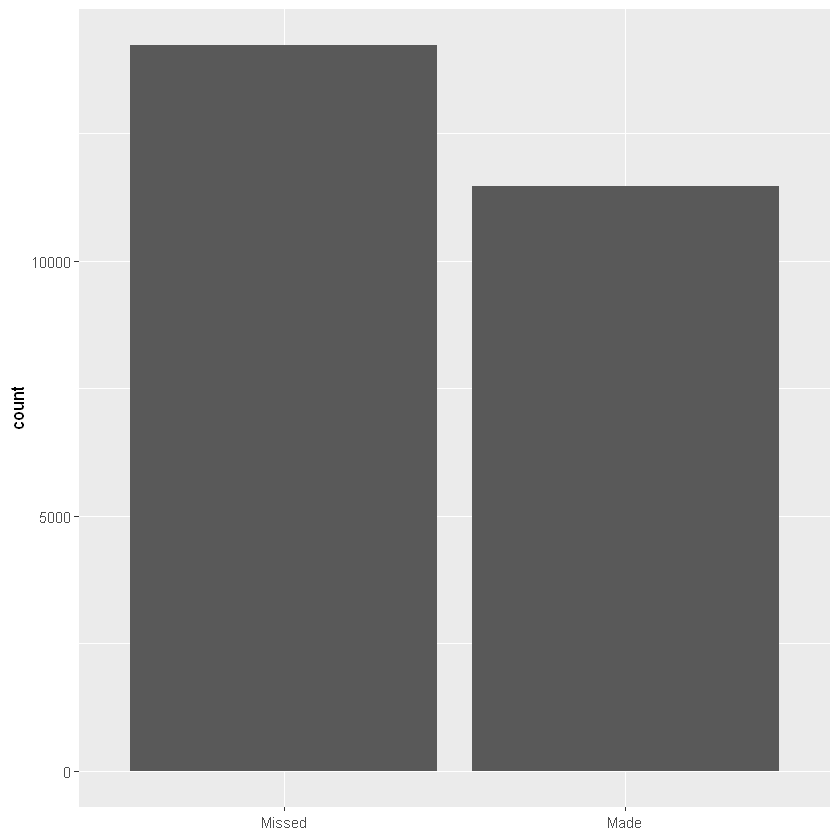

In [27]:
library(ggplot2)
library(dplyr)
ggplot(Kobe) + geom_bar(mapping = aes(x= Kobe$shot_made_flag, fill = NULL),na.rm = TRUE)+labs(x = names(Kobe$shot_made_flag), fill = NULL)

targetpercent = nrow(Kobe[Kobe$shot_made_flag == "Made",])/nrow(Kobe)

print("Percent of positives")
print(targetpercent)
print("No need to under or over sample")

### Next I graphed the target variable against the categorical input variables.  My comments for each are as follows.  
#### shot_made_flag vs combined_shot_type: From this graph one can see that his most frequent shot is a jump shot, his dunk percentage is almost perfect, and his layup percentage is high as well.
#### shot_made_flag vs period: More shots taken in 1st and 3rd period.  Least number of shots made in the 4th period. 
#### shot_made_flag vs playoffs: Obviously less shots taken in the playoffs due to more regular season time.
#### shot_made_flag vs season: Shots taken is highest in the middle of career with dip in the middle, potentially due to injury. Percentage looks consistent overall with dips and spikes here and there. 
#### shot_made_flag vs shot_type: Higher percentage of 2 pointers made and more 2 pointers overall taken.
#### shot_made_flag vs shot_zone_area: More shots taken in center and it appears percentage goes up when closer to center.
#### shot_made_flag vs shot_zone_basic: Again, more shots made when closer to basket.  Most shots taken are mid-range.
#### shot_made_flag vs shot_zone_range: Higher percentage made when in closer range.
#### shot_made_flag vs oppenent: More shots taken against teams in division. Has better shooting percentage against some teams, but no real pattern to it.
#### shot_made_flag vs Home_Away: Slightly better shooting percentage at home.

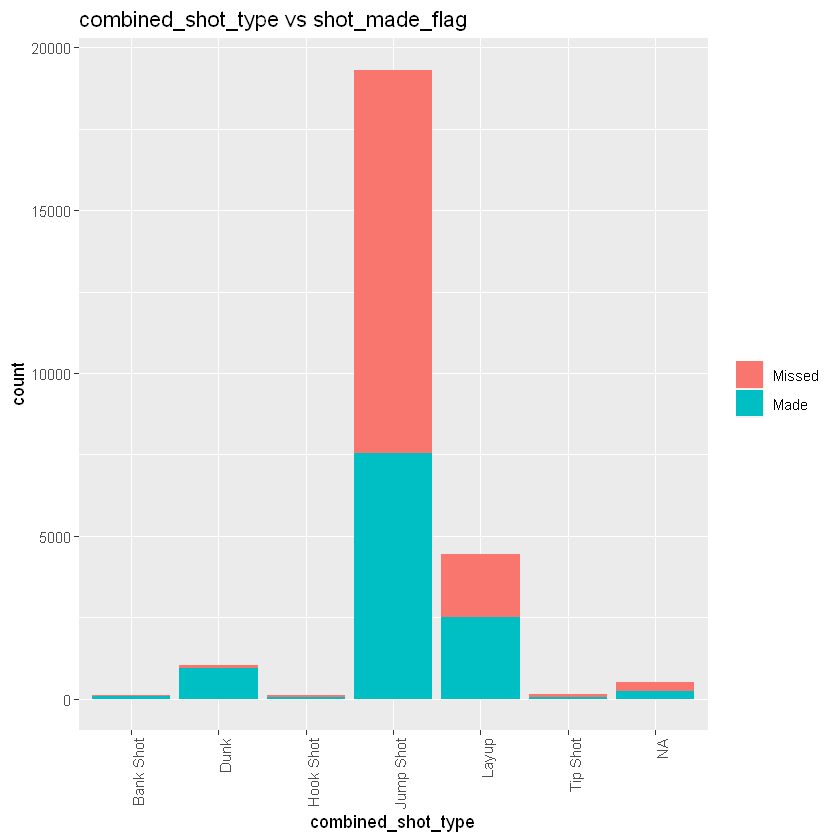

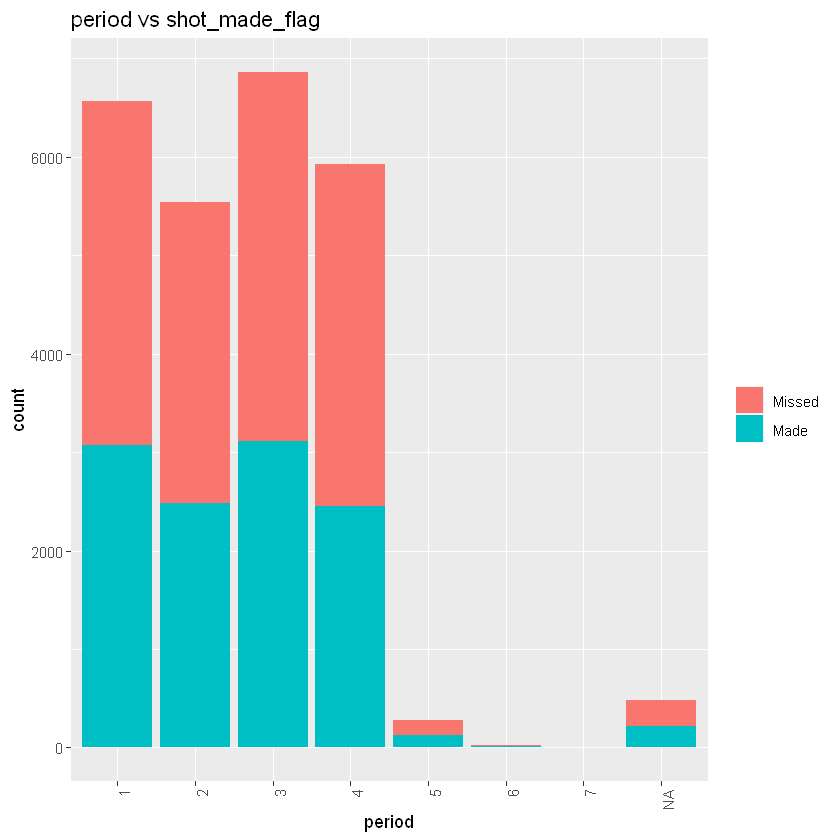

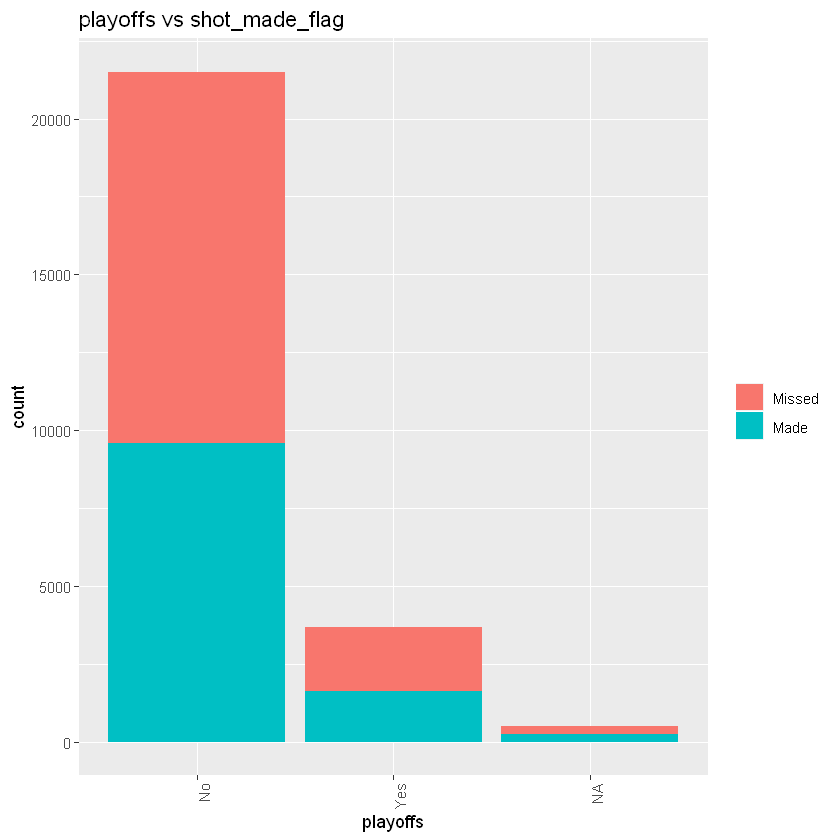

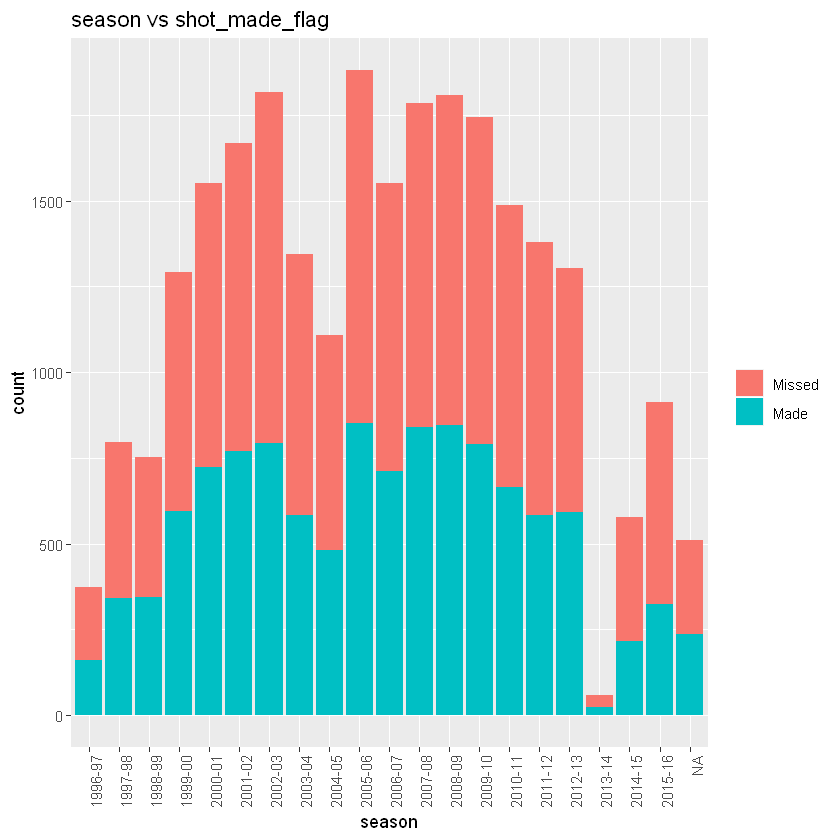

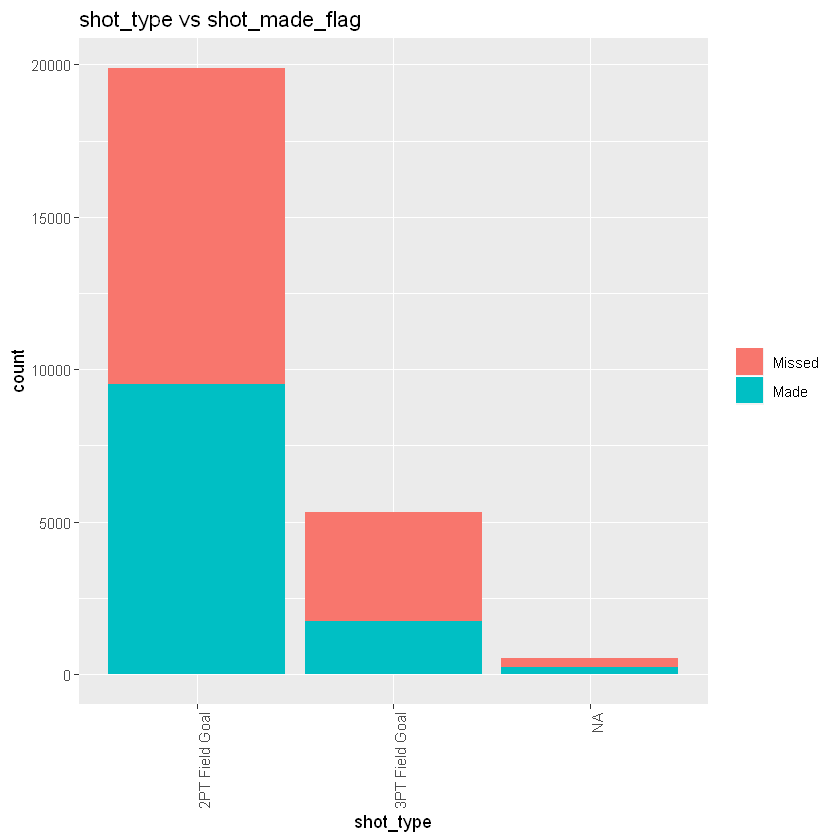

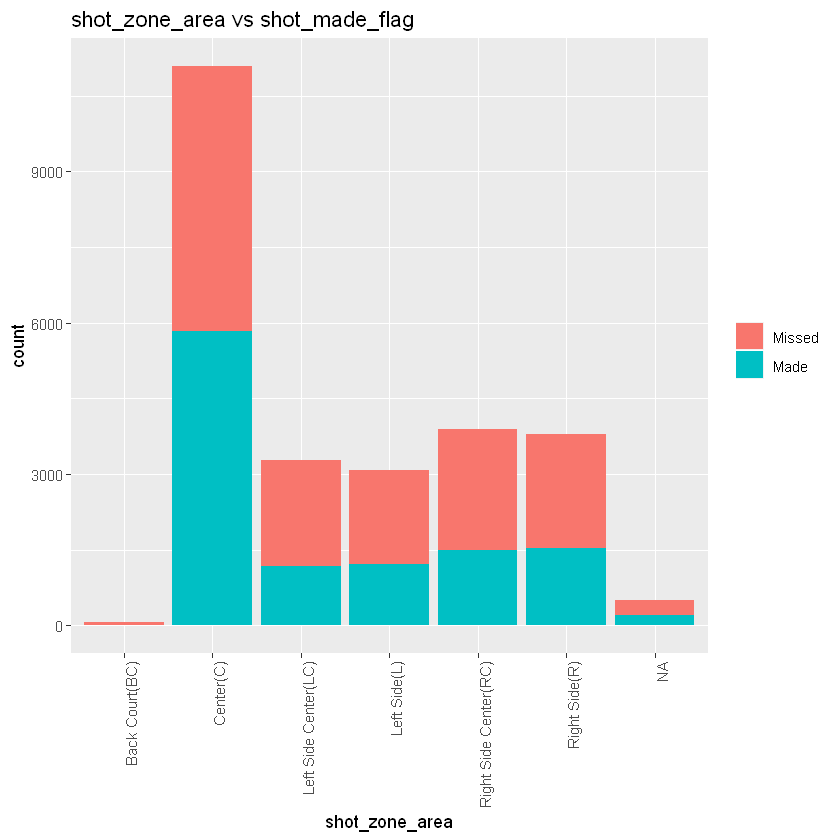

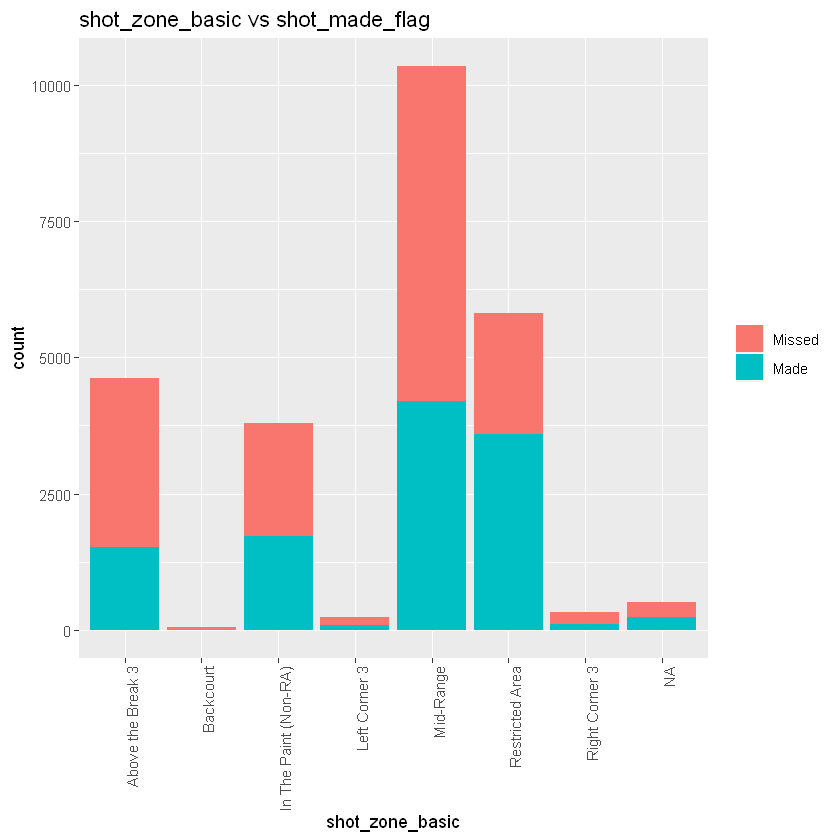

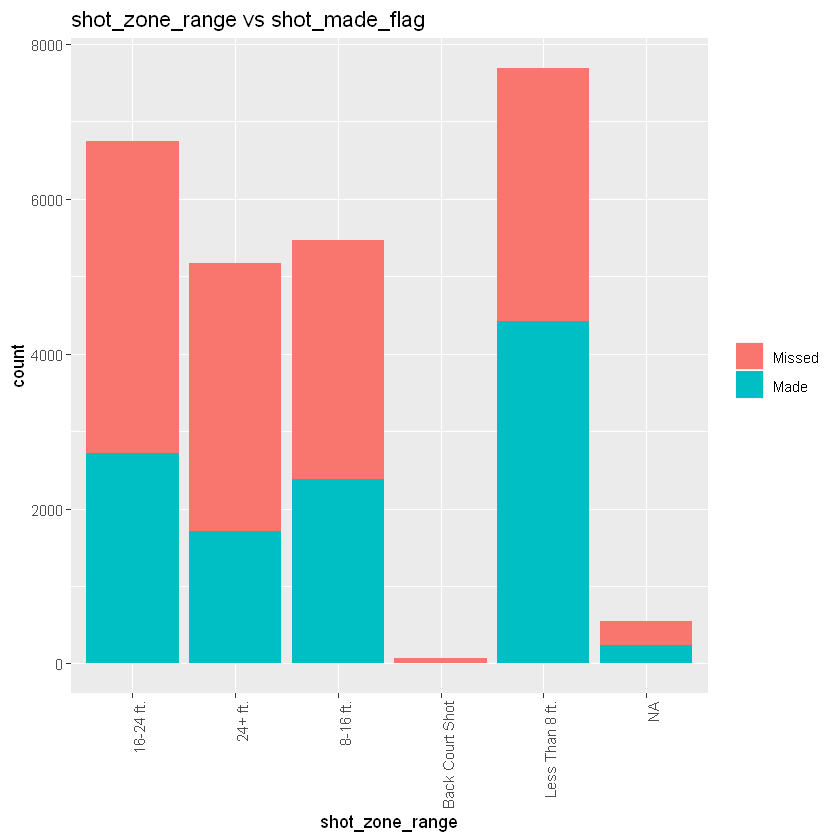

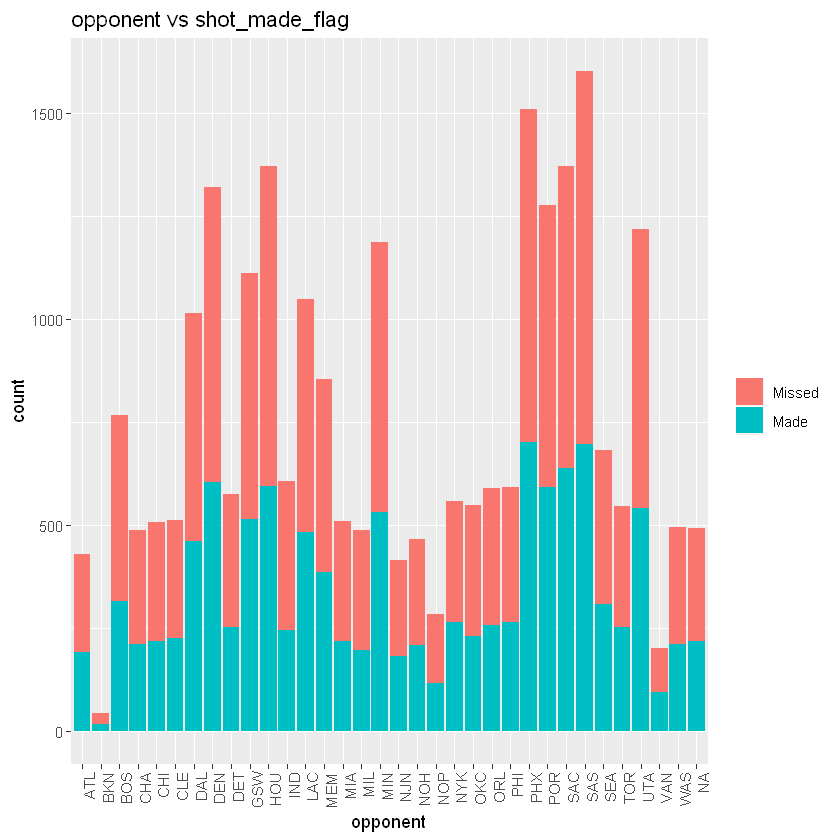

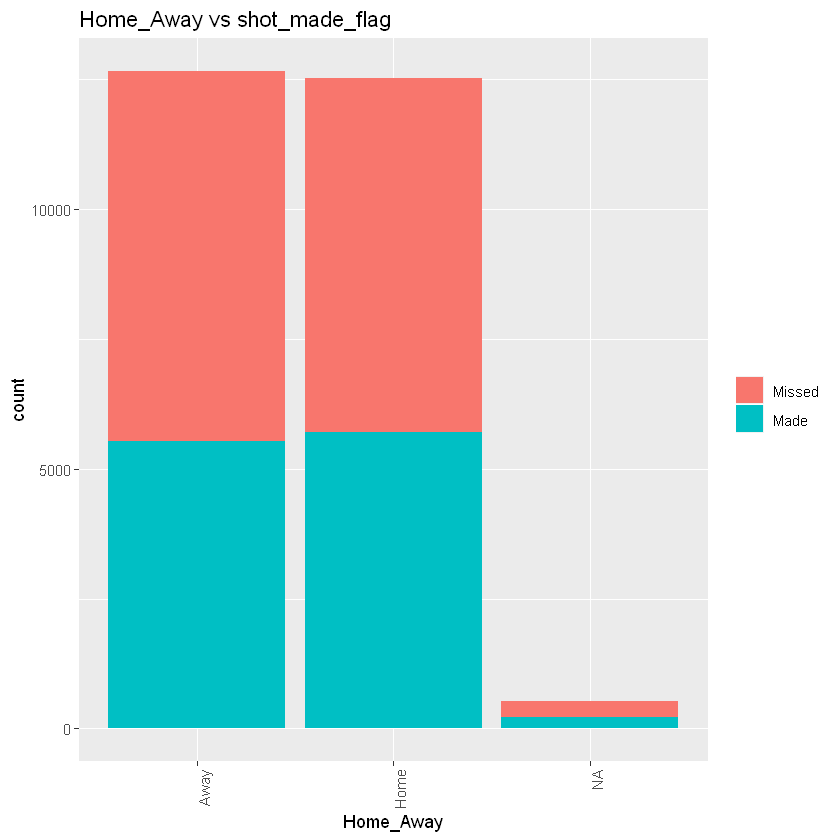

In [28]:
j = 8
for(i in 1:ncol(Kobe))
        {if(is.numeric(Kobe[,i]) == FALSE & i != j)
        {print(ggplot(Kobe) + geom_bar(mapping = aes(x=Kobe[,i], fill = Kobe$shot_made_flag),na.rm = TRUE)+theme(axis.text.x = element_text(angle = 90, hjust = 1))+labs(x = names(Kobe)[i], fill = names(Kobe$shot_made_flag), title = paste(names(Kobe)[i],"vs", names(Kobe)[8])))}
      }

### Next I graphed the taget variable against the numeric input variables.  The comments for each graph are as follows.
#### shot_made_flag vs loc_x: Shows when location x is closer to 0, closer to the hoop, more shots are taken and shooting percentage increases. 
#### shot_made_flag vs loc_y: Shows when location y is closer to 0, closer to the hoop, more shots are taken and shooting percentage increases. 
#### shot_made_flag vs shot_distance: Shows percentage increases when shots are taken closer to the hoop.  Also shows there are a lot of shots taken from the 15 to 30 ft range.
#### shot_made_flag vs game_date: Similar to season graph. More shots taken in middle of career and what seem to be random increases and decreases in the percentage throughout. 
#### shot_made_flag vs time_remaining_s: shots taken decrease as period goes on.  Shots missed spike in the beginning and end of a period.

Warning message:
"Removed 478 rows containing non-finite values (stat_density)."Warning message:
"Removed 478 rows containing non-finite values (stat_density)."

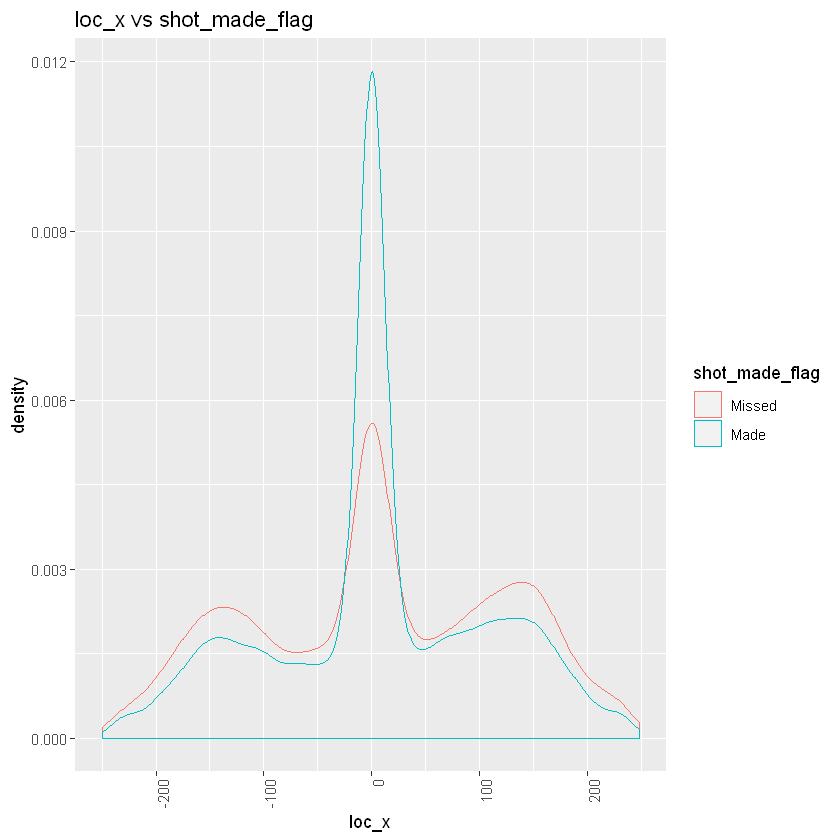

Warning message:
"Removed 525 rows containing non-finite values (stat_density)."

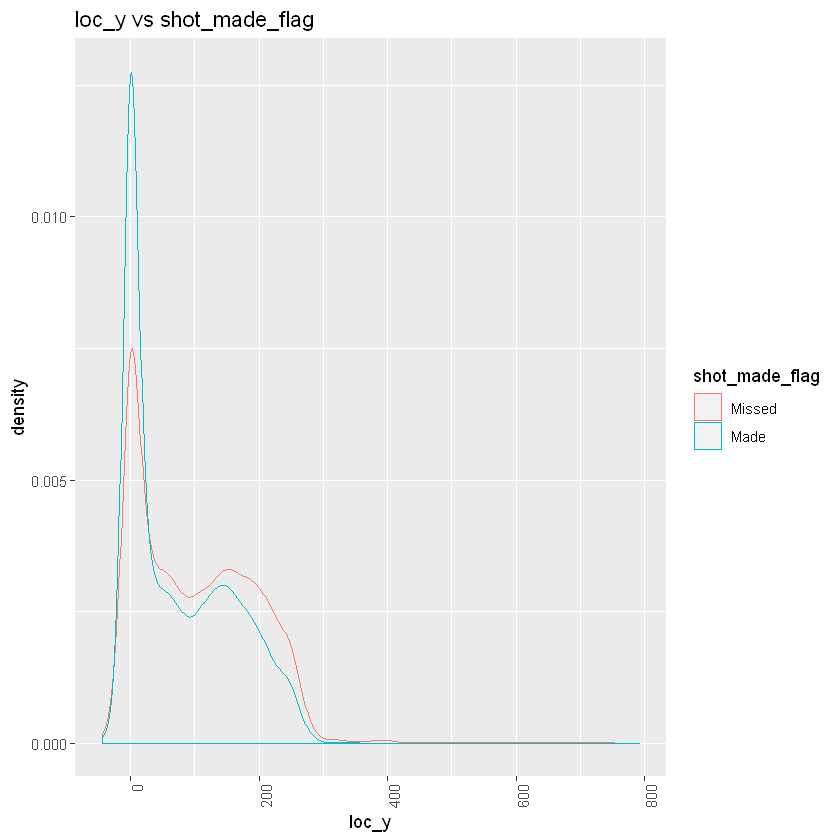

Warning message:
"Removed 484 rows containing non-finite values (stat_density)."

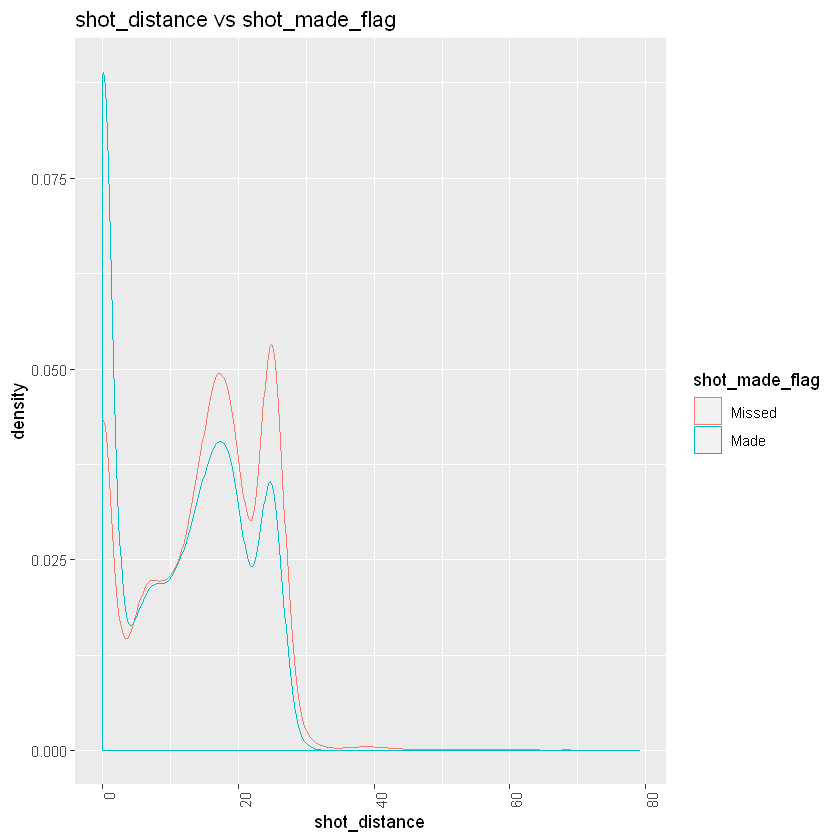

Warning message:
"Removed 1026 rows containing non-finite values (stat_density)."

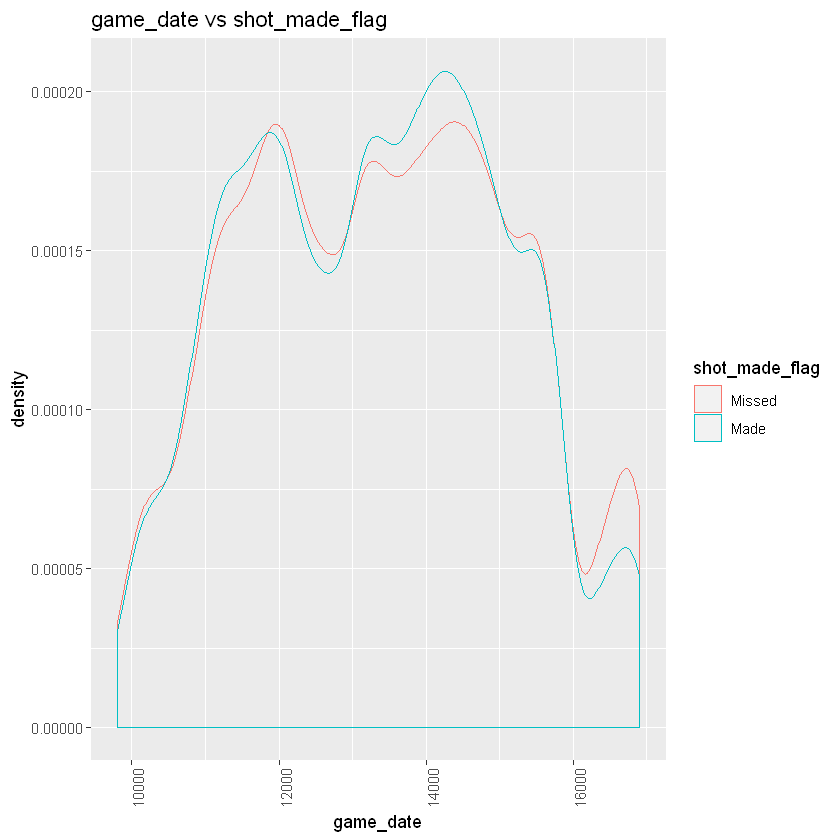

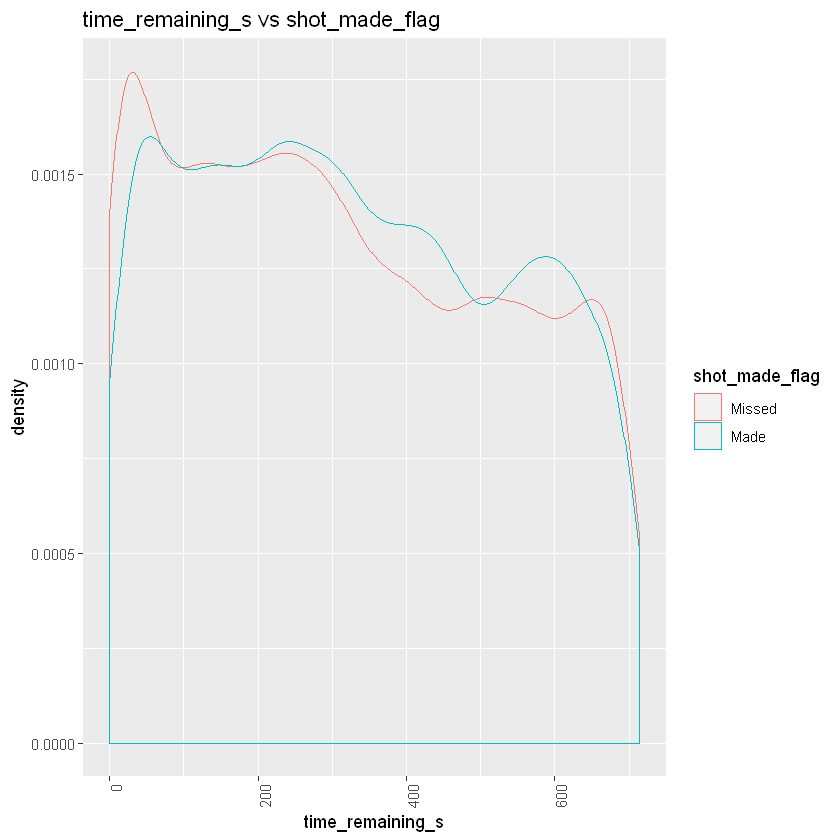

In [29]:
j =8 
for (i in 1:ncol(Kobe))
  {if(is.numeric(Kobe[,i]) == TRUE & i != j)
  {print(ggplot(Kobe) + geom_density(mapping = aes(x=Kobe[,i],  color = Kobe[,8]))+theme(axis.text.x = element_text(angle = 90, hjust = 1))+labs(x = names(Kobe)[i],color = names(Kobe[8]),title = paste(names(Kobe)[i],"vs", names(Kobe)[8])))}
  }

### Next, I graphed the loc_x and loc_y variables, classifying by the variables shot_type, shot_zone_area, shot_zone_basic, shot_range, and combined_shot_type.  This created a graph of halfcourt and labeled each shot based on the classification variable selected.  I found this showed me the difference between these variables.  Comments are below.
#### Court location vs Shot_Type: Shows court diagram with 3pt line seperating 3 pointers and 2 pointers.
#### Court location vs shot_zone_area: Shows court diagram seperated by what seems to be 6 distinct areas and the backcourt.
#### Court location vs shot_zone_basic: Shows court diagram seperated by restricted area, paint, midrange, left corner, right corner, 3pt line, and backcourt.
#### Court location vs shot_zone_range: Shows court diagram seperated by shot ranges.
#### Court location vs combined_shot_type: Shows court diagram and that a majority of shots are jumpshots.

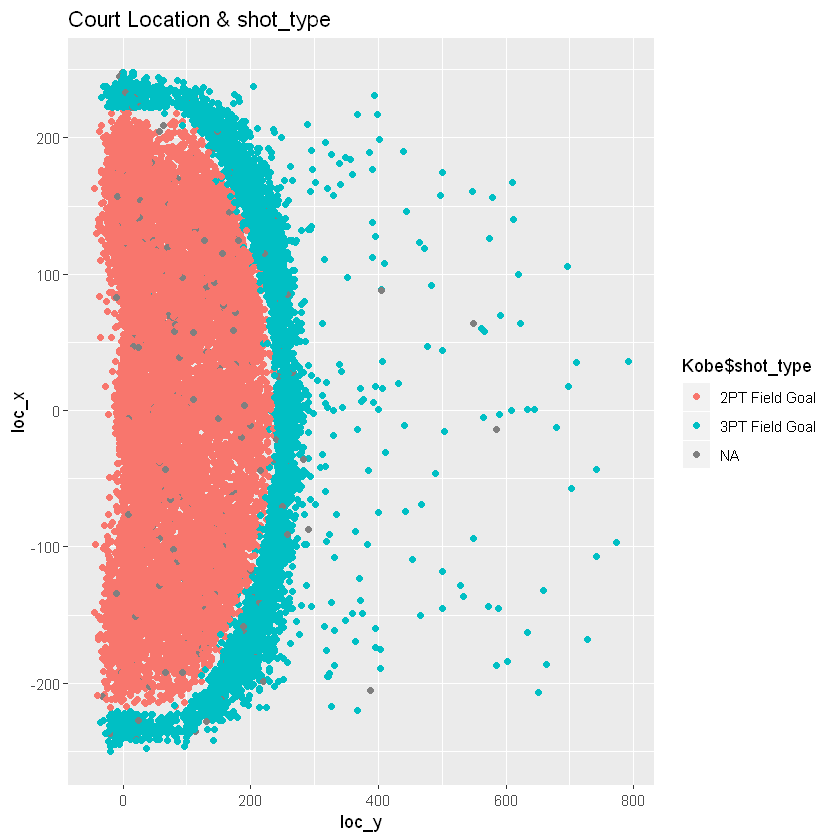

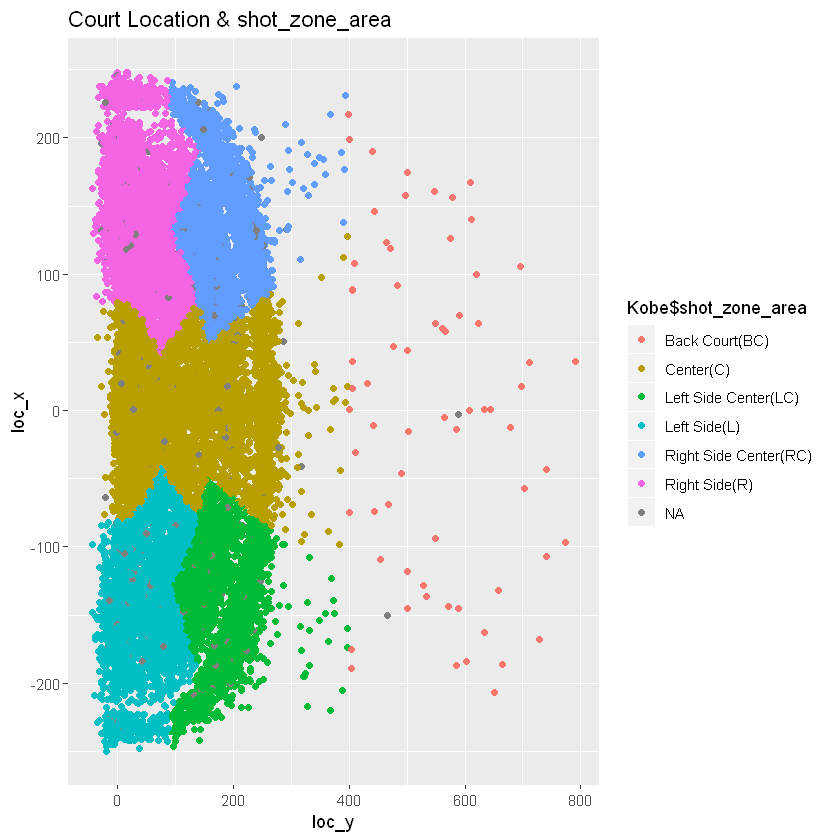

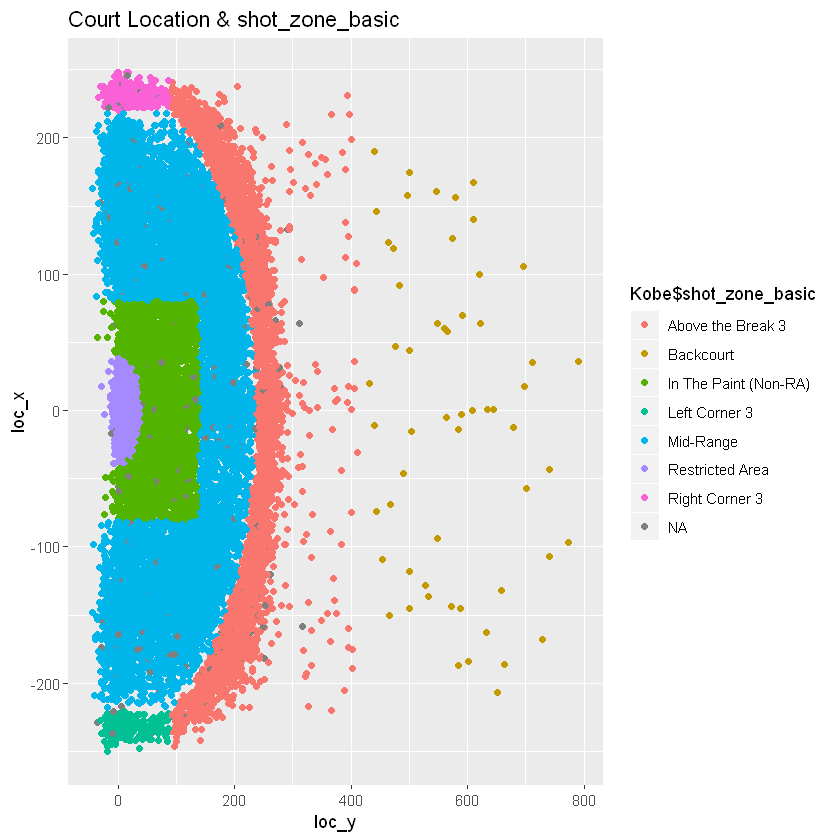

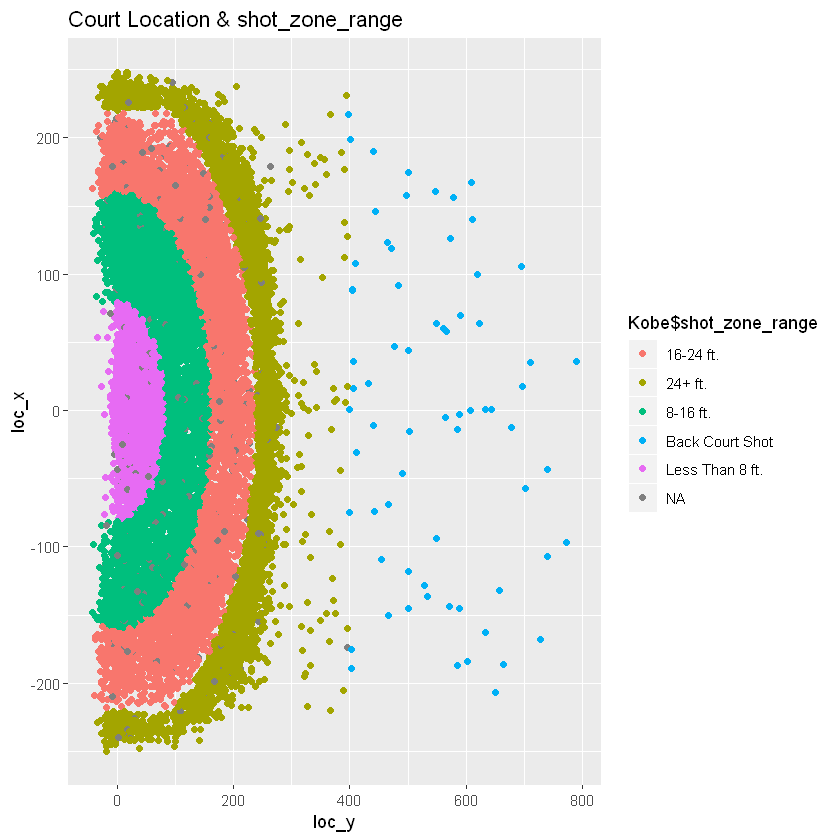

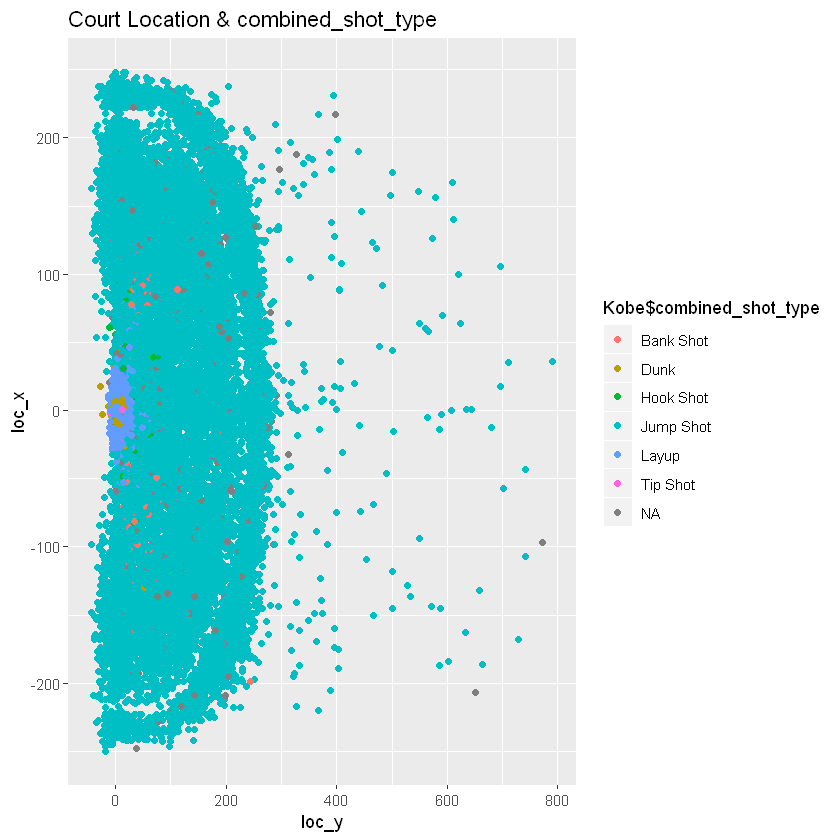

In [30]:
  print(ggplot(Kobe) + geom_point(mapping = aes(x=Kobe$loc_y, y = Kobe$loc_x , color = Kobe$shot_type),na.rm = TRUE)+labs(x = names(Kobe[3]), y = names(Kobe[2]), title = paste("Court Location &", names(Kobe[9]))))

  print(ggplot(Kobe) + geom_point(mapping = aes(x=Kobe$loc_y, y = Kobe$loc_x , color = Kobe$shot_zone_area),na.rm = TRUE)+labs(x = names(Kobe[3]), y = names(Kobe[2]), title = paste("Court Location &", names(Kobe[10]))))
  
  print(ggplot(Kobe) + geom_point(mapping = aes(x=Kobe$loc_y, y = Kobe$loc_x , color = Kobe$shot_zone_basic),na.rm = TRUE)+labs(x = names(Kobe[3]), y = names(Kobe[2]), title = paste("Court Location &", names(Kobe[11]))))
  
  print(ggplot(Kobe) + geom_point(mapping = aes(x=Kobe$loc_y, y = Kobe$loc_x , color = Kobe$shot_zone_range),na.rm = TRUE)+labs(x = names(Kobe[3]), y = names(Kobe[2]), title = paste("Court Location &", names(Kobe[12]))))

   print(ggplot(Kobe) + geom_point(mapping = aes(x=Kobe$loc_y, y = Kobe$loc_x , color = Kobe$combined_shot_type),na.rm = TRUE)+labs(x = names(Kobe[3]), y = names(Kobe[2]), title = paste("Court Location &", names(Kobe[1]))))

### The last graphs I made measured the different shot classifications by shot_distance. Comments for each graph can be found below.
#### shot_distance vs Shot_Type: Shows 3 pointers start around 22 feet from basket. 
#### shot_distance vs shot_zone_area: Shows center is closest to basket, followed by left center and right center, then right and left, and finally backcourt. 
#### shot_distance vs shot_zone_basic: Shows how far the restricted area, paint, midrange, left corner, right corner, 3pt line, and backcourt are from basket. 
#### shot_distance vs shot_zone_range: Shows the density of distances in each range. 
#### shot_distance vs combined_shot_type: Shows tips, dunks, and layups are very close to basket while hook, jump, and bankshots are not.

Warning message:
"Removed 525 rows containing non-finite values (stat_density)."Warning message:
"Removed 525 rows containing non-finite values (stat_density)."

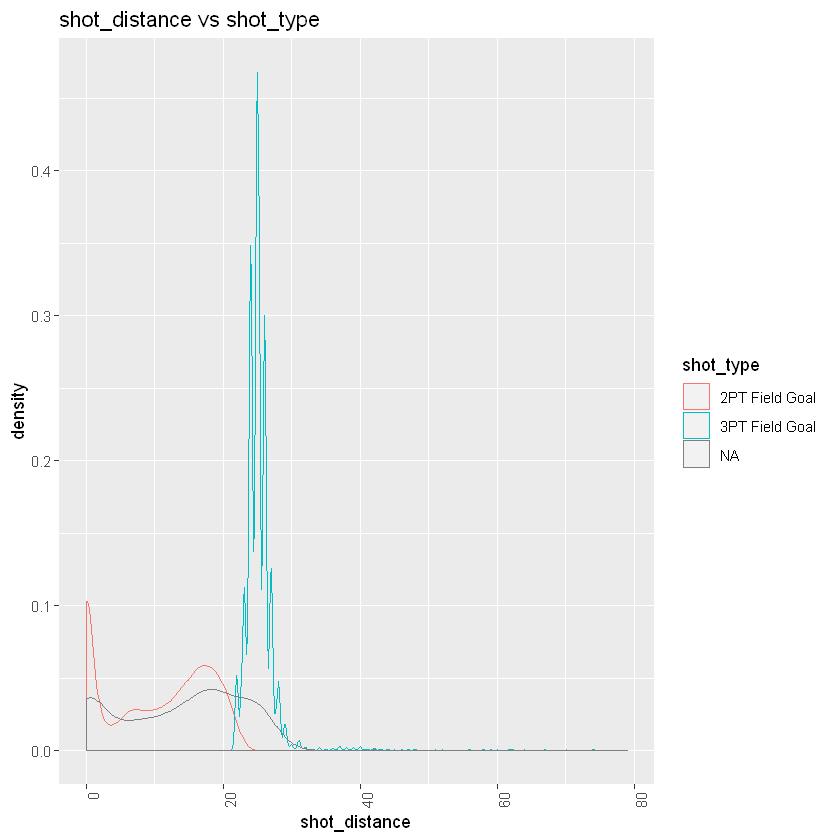

Warning message:
"Removed 525 rows containing non-finite values (stat_density)."

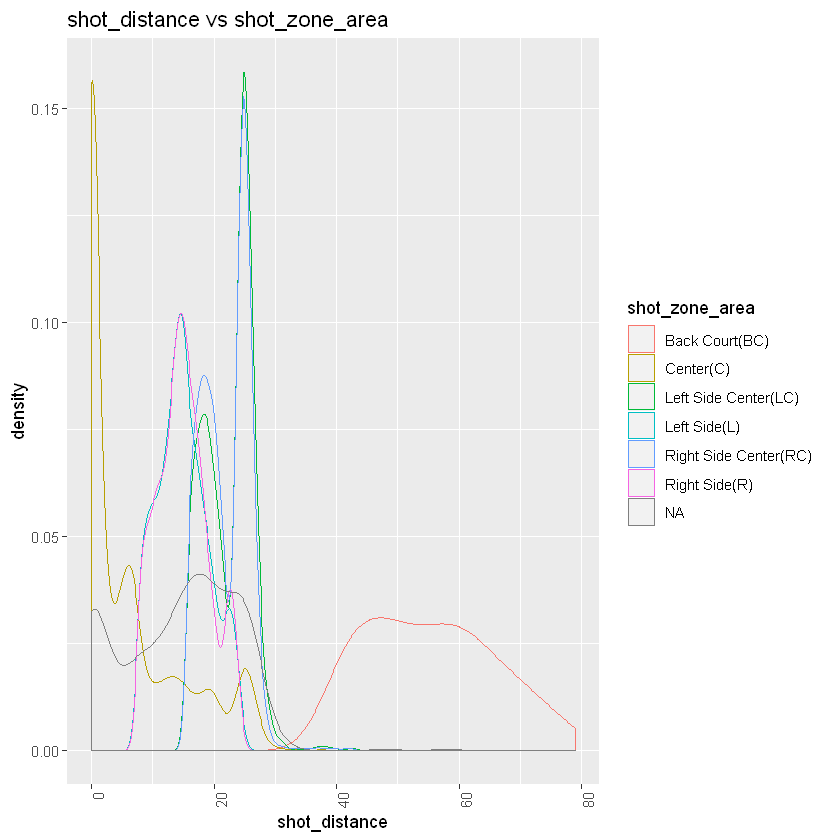

Warning message:
"Removed 525 rows containing non-finite values (stat_density)."

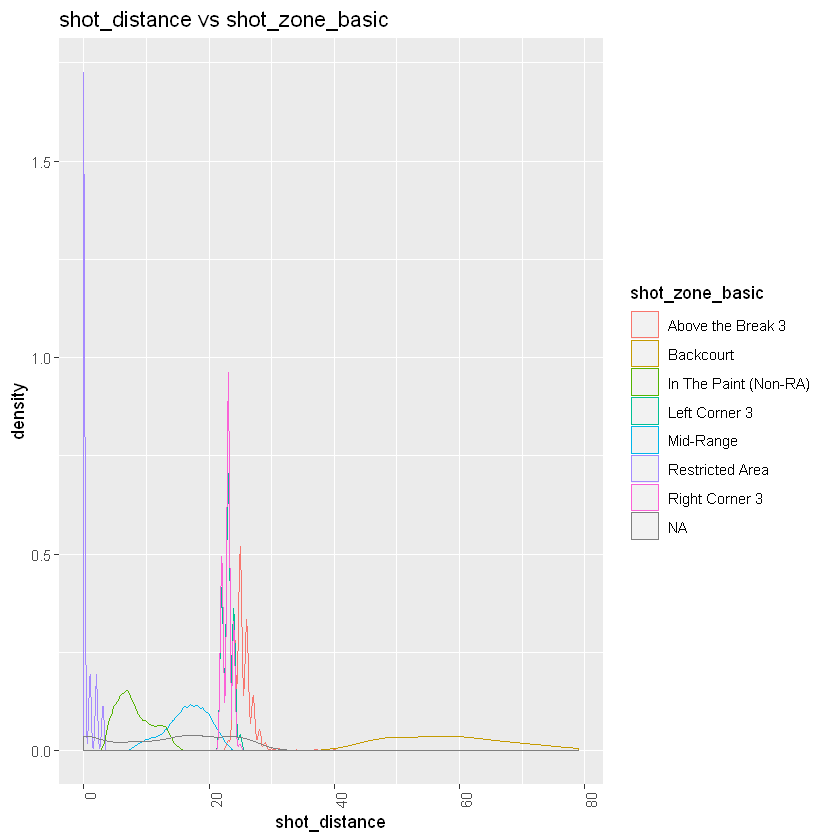

Warning message:
"Removed 525 rows containing non-finite values (stat_density)."

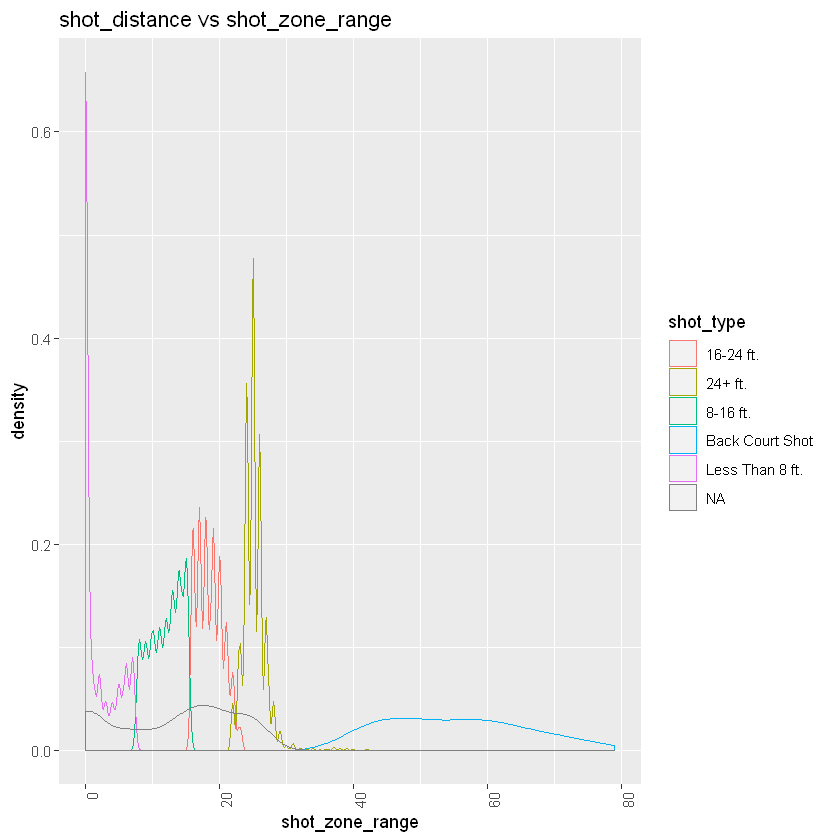

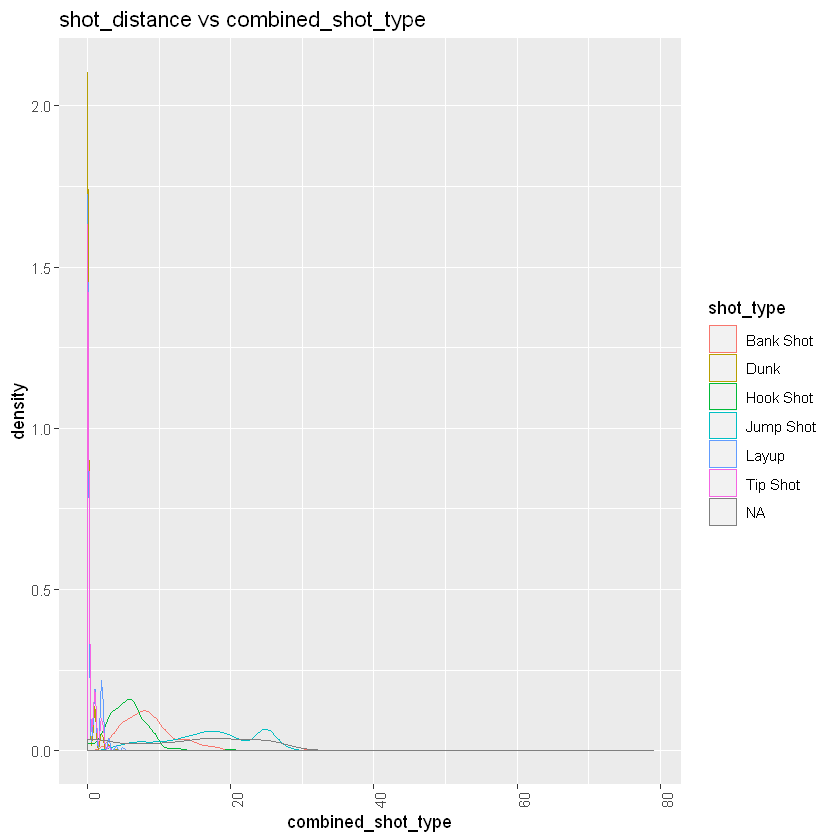

In [31]:
print(ggplot(Kobe) + geom_density(mapping = aes(x=Kobe[,7],  color = Kobe[,9]))+theme(axis.text.x = element_text(angle = 90, hjust = 1))+labs(x = names(Kobe)[7],color = names(Kobe[9]),title = paste(names(Kobe)[7],"vs", names(Kobe)[9])))

print(ggplot(Kobe) + geom_density(mapping = aes(x=Kobe[,7],  color = Kobe[,10]))+theme(axis.text.x = element_text(angle = 90, hjust = 1))+labs(x = names(Kobe)[7],color = names(Kobe[10]),title = paste(names(Kobe)[7],"vs", names(Kobe)[10])))

print(ggplot(Kobe) + geom_density(mapping = aes(x=Kobe[,7],  color = Kobe[,11]))+theme(axis.text.x = element_text(angle = 90, hjust = 1))+labs(x = names(Kobe)[7],color = names(Kobe[11]),title = paste(names(Kobe)[7],"vs", names(Kobe)[11])))

print(ggplot(Kobe) + geom_density(mapping = aes(x=Kobe[,7],  color = Kobe[,12]))+theme(axis.text.x = element_text(angle = 90, hjust = 1))+labs(x = names(Kobe)[12],color = names(Kobe[9]),title = paste(names(Kobe)[7],"vs", names(Kobe)[12])))

print(ggplot(Kobe) + geom_density(mapping = aes(x=Kobe[,7],  color = Kobe[,1]))+theme(axis.text.x = element_text(angle = 90, hjust = 1))+labs(x = names(Kobe)[1],color = names(Kobe[9]),title = paste(names(Kobe)[7],"vs", names(Kobe)[1])))

## Handling Missing Values

### The next step was to handle missing values.  I tried three different approaches.  The first was to simply remove all missing values with the complete cases function.  This left me with the Kobe_CC subset.  The second was to replace categorical missing values with their variable's mode and numeric missing values with the variables Median.  This left me with the subset Kobe_Med.  The last was to replace categorical missing values with their variable's mode and numeric missing values with knn imputation, centering and scaling the variables and replacing missing values with values of similar observations.  This left me with my third subset Kobe_knn.  

In [32]:
sum(is.na(Kobe))
KobeCC = Kobe[complete.cases(Kobe),]
sum(is.na(KobeCC))

[1] 8120

[1] 0

In [33]:
calculate_mode <- function(x) {
  uniqx <- unique(x)
  uniqx[which.max(tabulate(match(x, uniqx)))]
}

KobeMed = Kobe 

for(i in 1:ncol(KobeMed))
{
if(is.numeric(KobeMed[,i])==FALSE)
{KobeMed[,i][is.na(KobeMed[,i])] <-  calculate_mode(KobeMed[,i])}
}

library(rpart)
library(caret)
preProcess_missingdata_model <- preProcess(KobeMed, method='medianImpute')
KobeMed <- predict(preProcess_missingdata_model, newdata = KobeMed)

sum(is.na(KobeMed))

[1] 0

In [34]:
Kobeknn = Kobe 

for(i in 1:ncol(Kobeknn))
{
if(is.numeric(Kobeknn[,i])==FALSE)
{Kobeknn[,i][is.na(Kobeknn[,i])] <-  calculate_mode(Kobeknn[,i])}
}

library(rpart)
library(caret)
preProcess_missingdata_model <- preProcess(Kobeknn, method='knnImpute')
Kobeknn <- predict(preProcess_missingdata_model, newdata = Kobeknn)

sum(is.na(Kobeknn))

[1] 0

### As you will see later on.  These 3 different methods had different impacts on the models I ran.  I found that different missing value treatments actually had different effects on different models.  For the Random Forest, median imputation worked best, followed by knn imputation, followed by complete cases.  For the GLMnet, complete cases worked best, followed by knn impuation, followed by median impuation. For the decision tree there was an interaction between missing value method and encoding method.  For decision trees with single variable encoding, knn imputation worked best, followed by complete cases, followed by median imputation. For decision trees with multi variable encoding, knn and Median imputation were equal, followed by complete cases.  Lastly, for neural networks there was also an interaction between missing value method and encoding method.  For neural networks with single variable encoding, knn imputaion was best, followed by median imputation, followed by complete cases.  For neural networks with multi variable encoding, knn imputation was best, followed by complete cases, followed by median imputation.

## Recoding

### The next thing I did was try and recode categorical variables with over 10 categories.  To do this I recoded season to 90's, 2000-2005, 2006-2010, and post 2010.  I also recoded opponent to Atlantic, Southeast, Central, Northwest, Pacific, Southwest.  By doing this I created 3 new sets of data with recoded values; Kobe_CC_r, Kobe_Med_r, and Kobe_knn_r, in addition to the 3 originals. 

In [35]:
KobeCC_r = KobeCC
levels(KobeCC_r$season)
levels(KobeCC_r$season) = c("","90s", "90s","90s","90s", "2000 - 2005", "2000 - 2005", "2000 - 2005", "2000 - 2005", "2000 - 2005", "2000 - 2005", "2006 - 2010", "2006 - 2010", "2006 - 2010", "2006 - 2010", "2006 - 2010", "Post 2010", "Post 2010", "Post 2010", "Post 2010", "Post 2010")

levels(KobeCC_r$opponent)
levels(KobeCC_r$opponent) = c("", "Southeast", "Atlantic", "Atlantic", "Southeast", "Central", "Central", "Southwest", "Northwest", "Central", "Pacific", "Southwest", "Central", "Pacific", "Southwest", "Southeast", "Central", "Northwest" , "Atlantic", "Southwest", "Southwest", "Atlantic", "Northwest", "Southeast", "Atlantic", "Pacific", "Northwest", "Pacific", "Southwest", "Northwest", "Atlantic", "Northwest", "Southwest", "Southeast")

KobeMed_r = KobeMed
levels(KobeMed_r$season)
levels(KobeMed_r$season) = c("","90s", "90s","90s","90s", "2000 - 2005", "2000 - 2005", "2000 - 2005", "2000 - 2005", "2000 - 2005", "2000 - 2005", "2006 - 2010", "2006 - 2010", "2006 - 2010", "2006 - 2010", "2006 - 2010", "Post 2010", "Post 2010", "Post 2010", "Post 2010", "Post 2010")

levels(KobeMed_r$opponent)
levels(KobeMed_r$opponent) = c("", "Southeast", "Atlantic", "Atlantic", "Southeast", "Central", "Central", "Southwest", "Northwest", "Central", "Pacific", "Southwest", "Central", "Pacific", "Southwest", "Southeast", "Central", "Northwest" , "Atlantic", "Southwest", "Southwest", "Atlantic", "Northwest", "Southeast", "Atlantic", "Pacific", "Northwest", "Pacific", "Southwest", "Northwest", "Atlantic", "Northwest", "Southwest", "Southeast")

Kobeknn_r = Kobeknn
levels(Kobeknn_r$season)
levels(Kobeknn_r$season) = c("","90s", "90s","90s","90s", "2000 - 2005", "2000 - 2005", "2000 - 2005", "2000 - 2005", "2000 - 2005", "2000 - 2005", "2006 - 2010", "2006 - 2010", "2006 - 2010", "2006 - 2010", "2006 - 2010", "Post 2010", "Post 2010", "Post 2010", "Post 2010", "Post 2010")

levels(Kobeknn_r$opponent)
levels(Kobeknn_r$opponent) = c("", "Southeast", "Atlantic", "Atlantic", "Southeast", "Central", "Central", "Southwest", "Northwest", "Central", "Pacific", "Southwest", "Central", "Pacific", "Southwest", "Southeast", "Central", "Northwest" , "Atlantic", "Southwest", "Southwest", "Atlantic", "Northwest", "Southeast", "Atlantic", "Pacific", "Northwest", "Pacific", "Southwest", "Northwest", "Atlantic", "Northwest", "Southwest", "Southeast")

[1] ""        "1996-97" "1997-98" "1998-99" "1999-00" "2000-01" "2001-02"
 [8] "2002-03" "2003-04" "2004-05" "2005-06" "2006-07" "2007-08" "2008-09"
[15] "2009-10" "2010-11" "2011-12" "2012-13" "2013-14" "2014-15" "2015-16"

[1] ""    "ATL" "BKN" "BOS" "CHA" "CHI" "CLE" "DAL" "DEN" "DET" "GSW" "HOU"
[13] "IND" "LAC" "MEM" "MIA" "MIL" "MIN" "NJN" "NOH" "NOP" "NYK" "OKC" "ORL"
[25] "PHI" "PHX" "POR" "SAC" "SAS" "SEA" "TOR" "UTA" "VAN" "WAS"

[1] ""        "1996-97" "1997-98" "1998-99" "1999-00" "2000-01" "2001-02"
 [8] "2002-03" "2003-04" "2004-05" "2005-06" "2006-07" "2007-08" "2008-09"
[15] "2009-10" "2010-11" "2011-12" "2012-13" "2013-14" "2014-15" "2015-16"

[1] ""    "ATL" "BKN" "BOS" "CHA" "CHI" "CLE" "DAL" "DEN" "DET" "GSW" "HOU"
[13] "IND" "LAC" "MEM" "MIA" "MIL" "MIN" "NJN" "NOH" "NOP" "NYK" "OKC" "ORL"
[25] "PHI" "PHX" "POR" "SAC" "SAS" "SEA" "TOR" "UTA" "VAN" "WAS"

[1] ""        "1996-97" "1997-98" "1998-99" "1999-00" "2000-01" "2001-02"
 [8] "2002-03" "2003-04" "2004-05" "2005-06" "2006-07" "2007-08" "2008-09"
[15] "2009-10" "2010-11" "2011-12" "2012-13" "2013-14" "2014-15" "2015-16"

[1] ""    "ATL" "BKN" "BOS" "CHA" "CHI" "CLE" "DAL" "DEN" "DET" "GSW" "HOU"
[13] "IND" "LAC" "MEM" "MIA" "MIL" "MIN" "NJN" "NOH" "NOP" "NYK" "OKC" "ORL"
[25] "PHI" "PHX" "POR" "SAC" "SAS" "SEA" "TOR" "UTA" "VAN" "WAS"

### In terms of modeling, which will be seen later on, I found that recoding typically helped improve accuracy, but the extent it helped depended on the model. For random forests, accuracy rates were slightly improved.  For GLMnets, accuracy rates were improved across the board. For decision trees, recoded made almost no difference. For Neural Networks recoded accuracy rates were improved accross the board. 

## Encoding

### The last data preperation step I took was encoding.  I used two different encoding methods.  Single variable encoding, encoding categorical variables to values in a single variable, and multi variable encoding, encoding categorical variables to values in individual variables denoted with 1 when they were true.  This turned my 6 versions of data into 12. I added _s to sets with single varible encoding and _m to sets with multivariable encoding.  

In [36]:
print("median, not recoded, single variable")
KobeMed_s <- KobeMed
for(i in 1:ncol(KobeMed_s))
{if(is.numeric(KobeMed_s[,i]) ==FALSE )
{KobeMed_s[,i] = as.integer(KobeMed_s[,i])}
}
KobeMed_s$shot_made_flag <- KobeMed$shot_made_flag

print("knn, not recoded, single variable")
Kobeknn_s <- Kobeknn
for(i in 1:ncol(Kobeknn_s))
{if(is.numeric(Kobeknn_s[,i]) ==FALSE )
{Kobeknn_s[,i] = as.integer(Kobeknn_s[,i])}
}
Kobeknn_s$shot_made_flag <- Kobeknn$shot_made_flag

print("Complete, not recoded, single variable")
KobeCC_s <- KobeCC
for(i in 1:ncol(KobeCC_s))
{if(is.numeric(KobeCC_s[,i]) ==FALSE )
{KobeCC_s[,i] = as.integer(KobeCC_s[,i])}
}
KobeCC_s$shot_made_flag <- KobeCC$shot_made_flag

print("Median, recoded, single variable")
KobeMed_r_s <- KobeMed_r
for(i in 1:ncol(KobeMed_r_s))
{if(is.numeric(KobeMed_r_s[,i]) ==FALSE )
{KobeMed_r_s[,i] = as.integer(KobeMed_r_s[,i])}
}
KobeMed_r_s$shot_made_flag <- KobeMed_r$shot_made_flag

print("knn, recoded, single variable")
Kobeknn_r_s <- Kobeknn_r
for(i in 1:ncol(Kobeknn_r_s))
{if(is.numeric(Kobeknn_r_s[,i]) ==FALSE )
{Kobeknn_r_s[,i] = as.integer(Kobeknn_r_s[,i])}
}
Kobeknn_r_s$shot_made_flag <- Kobeknn_r$shot_made_flag

print("Completed, recoded, single variable")
KobeCC_r_s <- KobeCC_r
for(i in 1:ncol(KobeCC_r_s))
{if(is.numeric(KobeCC_r_s[,i]) ==FALSE )
{KobeCC_r_s[,i] = as.integer(KobeCC_r_s[,i])}
}
KobeCC_r_s$shot_made_flag <- KobeCC_r$shot_made_flag

print("Median, not recoded, multi variable")
dummies_model <- dummyVars(shot_made_flag ~ ., data=KobeMed)
KobeMed_mat <- predict(dummies_model, newdata = KobeMed)
KobeMed_m <- data.frame(KobeMed_mat)
KobeMed_m$shot_made_flag <- KobeMed$shot_made_flag

print("knn, not recoded, multi variable")
dummies_model <- dummyVars(shot_made_flag ~ ., data=Kobeknn)
Kobeknn_mat <- predict(dummies_model, newdata = Kobeknn)
Kobeknn_m <- data.frame(Kobeknn_mat)
Kobeknn_m$shot_made_flag <- Kobeknn$shot_made_flag

print("Complete, not recoded, multi variable")
dummies_model <- dummyVars(shot_made_flag ~ ., data=KobeCC)
KobeCC_mat <- predict(dummies_model, newdata = KobeCC)
KobeCC_m <- data.frame(KobeCC_mat)
KobeCC_m$shot_made_flag <- KobeCC$shot_made_flag

print("Median, recoded, multi variable")
dummies_model <- dummyVars(shot_made_flag ~ ., data=KobeMed_r)
KobeMed_r_mat <- predict(dummies_model, newdata = KobeMed_r)
KobeMed_r_m <- data.frame(KobeMed_r_mat)
KobeMed_r_m$shot_made_flag <- KobeMed_r$shot_made_flag

print("knn, recoded, multi variable")
dummies_model <- dummyVars(shot_made_flag ~ ., data=Kobeknn_r)
Kobeknn_r_mat <- predict(dummies_model, newdata = Kobeknn_r)
Kobeknn_r_m <- data.frame(Kobeknn_r_mat)
Kobeknn_r_m$shot_made_flag <- Kobeknn_r$shot_made_flag

print("Complete, recoded, multi variable")
dummies_model <- dummyVars(shot_made_flag ~ ., data=KobeCC_r)
KobeCC_r_mat <- predict(dummies_model, newdata = KobeCC_r)
KobeCC_r_m <- data.frame(KobeCC_r_mat)
KobeCC_r_m$shot_made_flag <- KobeCC_r$shot_made_flag

[1] "median, not recoded, single variable"
[1] "knn, not recoded, single variable"
[1] "Complete, not recoded, single variable"
[1] "Median, recoded, single variable"
[1] "knn, recoded, single variable"
[1] "Completed, recoded, single variable"
[1] "Median, not recoded, multi variable"


Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'shot_made_flag' is not a factor"

[1] "knn, not recoded, multi variable"


Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'shot_made_flag' is not a factor"

[1] "Complete, not recoded, multi variable"


Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'shot_made_flag' is not a factor"

[1] "Median, recoded, multi variable"


Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'shot_made_flag' is not a factor"

[1] "knn, recoded, multi variable"


Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'shot_made_flag' is not a factor"

[1] "Complete, recoded, multi variable"


Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'shot_made_flag' is not a factor"

### In terms of modeling, which will be seen next, I found single variable encoding best for random forests neural networks and multi variable encoding best for decision trees and glmnet models.

## Modeling

### Moving onto modeling, I ran a random forest, glmnet model, decision tree, and neural network on all 12 subsets of my data.  The model accuracies for each can be seen below.

### Median, Not recoded, single variable encoding (Kobe_Med_s)

In [37]:
set.seed(333)
myGrid = expand.grid(mtry = 1, splitrule = "gini",
                     min.node.size = 1)  
KobeMed_s_rf <- train( shot_made_flag~. ,data = KobeMed_s, method = "ranger", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGrid)
print("Accuracy random forest")
max(KobeMed_s_rf$results$Accuracy)

set.seed(333)
myGridglm = expand.grid(alpha = 0:1,
  lambda = seq(0.0001, 1, length = 1))
KobeMed_s_glm <- train( shot_made_flag~. ,data = KobeMed_s, method = "glmnet", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridglm)
print("Accuracy glm")
max(KobeMed_s_glm$results$Accuracy)

set.seed(333)
myGridrpart = expand.grid(cp = .05)
KobeMed_s_tree <- train( shot_made_flag~. ,data = KobeMed_s, method = "rpart", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridrpart)
print("Accuracy decision tree")
max(KobeMed_s_tree$results$Accuracy)

set.seed(333)
myGridnn = expand.grid(size=c(5), decay=c(1))
KobeMed_s_nn <- train( shot_made_flag~. ,data = KobeMed_s, method = "nnet", trace = FALSE, trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridnn)
print("Accuracy Neural Network")
max(KobeMed_s_nn$results$Accuracy)

[1] "Accuracy random forest"


[1] 0.612134

[1] "Accuracy glm"


[1] 0.603456

[1] "Accuracy decision tree"


[1] 0.5910808

[1] "Accuracy Neural Network"


[1] 0.6037671

### Knn, not recoded, single variable encoding (Kobe_knn_s)

In [38]:
set.seed(333)
myGrid = expand.grid(mtry = 1, splitrule = "gini",
                     min.node.size = 1)  
Kobeknn_s_rf <- train( shot_made_flag~. ,data = Kobeknn_s, method = "ranger", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGrid)
print("Accuracy random forest")
max(Kobeknn_s_rf$results$Accuracy)

set.seed(333)
myGridglm = expand.grid(alpha = 0:1,
  lambda = seq(0.0001, 1, length = 1))
Kobeknn_s_glm <- train( shot_made_flag~. ,data = Kobeknn_s, method = "glmnet", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridglm)
print("Accuracy glm")
max(Kobeknn_s_glm$results$Accuracy)

set.seed(333)
myGridrpart = expand.grid(cp = .05)
Kobeknn_s_tree <- train( shot_made_flag~. ,data = Kobeknn_s, method = "rpart", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridrpart)
print("Accuracy decision tree")
max(Kobeknn_s_tree$results$Accuracy)

set.seed(333)
myGridnn = expand.grid(size=c(5), decay=c(1))
Kobeknn_s_nn <- train( shot_made_flag~. ,data = Kobeknn_s, method = "nnet", trace = FALSE, trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridnn)
print("Accuracy Neural Network")
max(Kobeknn_s_nn$results$Accuracy)

[1] "Accuracy random forest"


[1] 0.6121729

[1] "Accuracy glm"


[1] 0.6052463

[1] "Accuracy decision tree"


[1] 0.5989415

[1] "Accuracy Neural Network"


[1] 0.6122508

### Completed Cases, not recoded, single variable encoding (Kobe_CC_s)

In [39]:
set.seed(333)
myGrid = expand.grid(mtry = 1, splitrule = "gini",
                     min.node.size = 1)  
KobeCC_s_rf <- train( shot_made_flag~. ,data = KobeCC_s, method = "ranger", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGrid)
print("Accuracy random forest")
max(KobeCC_s_rf$results$Accuracy)

set.seed(333)
myGridglm = expand.grid(alpha = 0:1,
  lambda = seq(0.0001, 1, length = 1))
KobeCC_s_glm <- train( shot_made_flag~. ,data = KobeCC_s, method = "glmnet", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridglm)
print("Accuracy glm")
max(KobeCC_s_glm$results$Accuracy)

set.seed(333)
myGridrpart = expand.grid(cp = .05)
KobeCC_s_tree <- train( shot_made_flag~. ,data = KobeCC_s, method = "rpart", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridrpart)
print("Accuracy decision tree")
max(KobeCC_s_tree$results$Accuracy)

set.seed(333)
myGridnn = expand.grid(size=c(5), decay=c(1))
KobeCC_s_nn <- train( shot_made_flag~. ,data = KobeCC_s, method = "nnet", trace = FALSE, trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridnn)
print("Accuracy Neural Network")
max(KobeCC_s_nn$results$Accuracy)

[1] "Accuracy random forest"


[1] 0.6119973

[1] "Accuracy glm"


[1] 0.6085193

[1] "Accuracy decision tree"


[1] 0.5950343

[1] "Accuracy Neural Network"


[1] 0.5958378

### Median, recoded, single variable encoding (Kobe_Med_r_s)

In [40]:
set.seed(333)
myGrid = expand.grid(mtry = 1, splitrule = "gini",
                     min.node.size = 1)  
KobeMed_r_s_rf <- train( shot_made_flag~. ,data = KobeMed_r_s, method = "ranger", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGrid)
print("Accuracy random forest")
max(KobeMed_r_s_rf$results$Accuracy)

set.seed(333)
myGridglm = expand.grid(alpha = 0:1,
  lambda = seq(0.0001, 1, length = 1))
KobeMed_r_s_glm <- train( shot_made_flag~. ,data = KobeMed_r_s, method = "glmnet", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridglm)
print("Accuracy glm")
max(KobeMed_r_s_glm$results$Accuracy)

set.seed(333)
myGridrpart = expand.grid(cp = .05)
KobeMed_r_s_tree <- train( shot_made_flag~. ,data = KobeMed_r_s, method = "rpart", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridrpart)
print("Accuracy decision tree")
max(KobeMed_r_s_tree$results$Accuracy)

set.seed(333)
myGridnn = expand.grid(size=c(5), decay=c(1))
KobeMed_r_s_nn <- train( shot_made_flag~. ,data = KobeMed_r_s, method = "nnet", trace = FALSE, trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridnn)
print("Accuracy Neural Network")
max(KobeMed_r_s_nn$results$Accuracy)

[1] "Accuracy random forest"


[1] 0.6122896

[1] "Accuracy glm"


[1] 0.6036117

[1] "Accuracy decision tree"


[1] 0.5910808

[1] "Accuracy Neural Network"


[1] 0.6068808

### Knn, recoded, single variable encoding (Kobe_knn_r_s)

In [41]:
set.seed(333)
myGrid = expand.grid(mtry = 1, splitrule = "gini",
                     min.node.size = 1)  
Kobeknn_r_s_rf <- train( shot_made_flag~. ,data = Kobeknn_r_s, method = "ranger", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGrid)
print("Accuracy random forest")
max(Kobeknn_r_s_rf$results$Accuracy)

set.seed(333)
myGridglm = expand.grid(alpha = 0:1,
  lambda = seq(0.0001, 1, length = 1))
Kobeknn_r_s_glm <- train( shot_made_flag~. ,data = Kobeknn_r_s, method = "glmnet", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridglm)
print("Accuracy glm")
max(Kobeknn_r_s_glm$results$Accuracy)

set.seed(333)
myGridrpart = expand.grid(cp = .05)
Kobeknn_r_s_tree <- train( shot_made_flag~. ,data = Kobeknn_r_s, method = "rpart", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridrpart)
print("Accuracy decision tree")
max(Kobeknn_r_s_tree$results$Accuracy)

set.seed(333)
myGridnn = expand.grid(size=c(5), decay=c(1))
Kobeknn_r_s_nn <- train( shot_made_flag~. ,data = Kobeknn_r_s, method = "nnet", trace = FALSE, trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridnn)
print("Accuracy Neural Network")
max(Kobeknn_r_s_nn$results$Accuracy)

[1] "Accuracy random forest"


[1] 0.6120561

[1] "Accuracy glm"


[1] 0.6065305

[1] "Accuracy decision tree"


[1] 0.5989415

[1] "Accuracy Neural Network"


[1] 0.6124065

### Complete Cases, recoded, single variable encoding (Kobe_CC_r_s)

In [42]:
set.seed(333)
myGrid = expand.grid(mtry = 1, splitrule = "gini",
                     min.node.size = 1)  
KobeCC_r_s_rf <- train( shot_made_flag~. ,data = KobeCC_r_s, method = "ranger", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGrid)
print("Accuracy random forest")
max(KobeCC_r_s_rf$results$Accuracy)

set.seed(333)
myGridglm = expand.grid(alpha = 0:1,
  lambda = seq(0.0001, 1, length = 1))
KobeCC_r_s_glm <- train( shot_made_flag~. ,data = KobeCC_r_s, method = "glmnet", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridglm)
print("Accuracy glm")
max(KobeCC_r_s_glm$results$Accuracy)

set.seed(333)
myGridrpart = expand.grid(cp = .05)
KobeCC_r_s_tree <- train( shot_made_flag~. ,data = KobeCC_r_s, method = "rpart", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridrpart)
print("Accuracy decision tree")
max(KobeCC_r_s_tree$results$Accuracy)

set.seed(333)
myGridnn = expand.grid(size=c(5), decay=c(1))
KobeCC_r_s_nn <- train( shot_made_flag~. ,data = KobeCC_r_s, method = "nnet", trace = FALSE, trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridnn)
print("Accuracy Neural Network")
max(KobeCC_r_s_nn$results$Accuracy)

[1] "Accuracy random forest"


[1] 0.6114622

[1] "Accuracy glm"


[1] 0.6092686

[1] "Accuracy decision tree"


[1] 0.5950343

[1] "Accuracy Neural Network"


[1] 0.5997445

### Median, not recoded, multi variable encoding (Kobe_Med_m)

In [43]:
set.seed(333)
myGrid = expand.grid(mtry = 1, splitrule = "gini",
                     min.node.size = 1)  
KobeMed_m_rf <- train( shot_made_flag~. ,data = KobeMed_m, method = "ranger", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGrid)
print("Accuracy random forest")
max(KobeMed_m_rf$results$Accuracy)

set.seed(333)
myGridglm = expand.grid(alpha = 0:1,
  lambda = seq(0.0001, 1, length = 1))
KobeMed_m_glm <- train( shot_made_flag~. ,data = KobeMed_m, method = "glmnet", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridglm)
print("Accuracy glm")
max(KobeMed_m_glm$results$Accuracy)

set.seed(333)
myGridrpart = expand.grid(cp = .05)
KobeMed_m_tree <- train( shot_made_flag~. ,data = KobeMed_m, method = "rpart", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridrpart)
print("Accuracy decision tree")
max(KobeMed_m_tree$results$Accuracy)

set.seed(333)
myGridnn = expand.grid(size=c(5), decay=c(1))
KobeMed_m_nn <- train( shot_made_flag~. ,data = KobeMed_m, method = "nnet", trace = FALSE, trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridnn)
print("Accuracy Neural Network")
max(KobeMed_m_nn$results$Accuracy)

[1] "Accuracy random forest"


[1] 0.553839

[1] "Accuracy glm"


[1] 0.6118617

[1] "Accuracy decision tree"


[1] 0.6117448

[1] "Accuracy Neural Network"


[1] 0.5964894

### knn, not recoded, multi variable (Kobe_knn_m)

In [44]:
set.seed(333)
myGrid = expand.grid(mtry = 1, splitrule = "gini",
                     min.node.size = 1)  
Kobeknn_m_rf <- train( shot_made_flag~. ,data = Kobeknn_m, method = "ranger", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGrid)
print("Accuracy random forest")
max(Kobeknn_m_rf$results$Accuracy)

set.seed(333)
myGridglm = expand.grid(alpha = 0:1,
  lambda = seq(0.0001, 1, length = 1))
Kobeknn_m_glm <- train( shot_made_flag~. ,data = Kobeknn_m, method = "glmnet", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridglm)
print("Accuracy glm")
max(Kobeknn_m_glm$results$Accuracy)

set.seed(333)
myGridrpart = expand.grid(cp = .05)
Kobeknn_m_tree <- train( shot_made_flag~. ,data = Kobeknn_m, method = "rpart", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridrpart)
print("Accuracy decision tree")
max(Kobeknn_m_tree$results$Accuracy)

set.seed(333)
myGridnn = expand.grid(size=c(5), decay=c(1))
Kobeknn_m_nn <- train( shot_made_flag~. ,data = Kobeknn_m, method = "nnet", trace = FALSE, trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridnn)
print("Accuracy Neural Network")
max(Kobeknn_m_nn$results$Accuracy)

[1] "Accuracy random forest"


[1] 0.553839

[1] "Accuracy glm"


[1] 0.6118229

[1] "Accuracy decision tree"


[1] 0.6117448

[1] "Accuracy Neural Network"


[1] 0.6066473

### Complete Case, not recoded, multi variable encoding (Kobe_CC_m)

In [45]:
set.seed(333)
myGrid = expand.grid(mtry = 1, splitrule = "gini",
                     min.node.size = 1)  
KobeCC_m_rf <- train( shot_made_flag~. ,data = KobeCC_m, method = "ranger", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGrid)
print("Accuracy random forest")
max(KobeCC_m_rf$results$Accuracy)

set.seed(333)
myGridglm = expand.grid(alpha = 0:1,
  lambda = seq(0.0001, 1, length = 1))
KobeCC_m_glm <- train( shot_made_flag~. ,data = KobeCC_m, method = "glmnet", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridglm)
print("Accuracy glm")
max(KobeCC_m_glm$results$Accuracy)

set.seed(333)
myGridrpart = expand.grid(cp = .05)
KobeCC_m_tree <- train( shot_made_flag~. ,data = KobeCC_m, method = "rpart", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridrpart)
print("Accuracy decision tree")
max(KobeCC_m_tree$results$Accuracy)

set.seed(333)
myGridnn = expand.grid(size=c(5), decay=c(1))
KobeCC_m_nn <- train( shot_made_flag~. ,data = KobeCC_m, method = "nnet", trace = FALSE, trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridnn)
print("Accuracy Neural Network")
max(KobeCC_m_nn$results$Accuracy)

[1] "Accuracy random forest"


[1] 0.5555972

[1] "Accuracy glm"


[1] 0.6118368

[1] "Accuracy decision tree"


[1] 0.5986188

[1] "Accuracy Neural Network"


[1] 0.6063794

### Median, recoded, multi variable encoding (Kobe_Med_r_m)

In [46]:
set.seed(333)
myGrid = expand.grid(mtry = 1, splitrule = "gini",
                     min.node.size = 1)  
KobeMed_r_m_rf <- train( shot_made_flag~. ,data = KobeMed_r_m, method = "ranger", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGrid)
print("Accuracy random forest")
max(KobeMed_r_m_rf$results$Accuracy)

set.seed(333)
myGridglm = expand.grid(alpha = 0:1,
  lambda = seq(0.0001, 1, length = 1))
KobeMed_r_m_glm <- train( shot_made_flag~. ,data = KobeMed_r_m, method = "glmnet", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridglm)
print("Accuracy glm")
max(KobeMed_r_m_glm$results$Accuracy)

set.seed(333)
myGridrpart = expand.grid(cp = .05)
KobeMed_r_m_tree <- train( shot_made_flag~. ,data = KobeMed_r_m, method = "rpart", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridrpart)
print("Accuracy decision tree")
max(KobeMed_r_m_tree$results$Accuracy)

set.seed(333)
myGridnn = expand.grid(size=c(5), decay=c(1))
KobeMed_r_m_nn <- train( shot_made_flag~. ,data = KobeMed_r_m, method = "nnet", trace = FALSE, trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridnn)
print("Accuracy Neural Network")
max(KobeMed_r_m_nn$results$Accuracy)

[1] "Accuracy random forest"


[1] 0.553839

[1] "Accuracy glm"


[1] 0.6135738

[1] "Accuracy decision tree"


[1] 0.6117448

[1] "Accuracy Neural Network"


[1] 0.5964504

### knn, recoded, multi variable encoding (Kobe_knn_r_m)

In [47]:
set.seed(333)
myGrid = expand.grid(mtry = 1, splitrule = "gini",
                     min.node.size = 1)  
Kobeknn_r_m_rf <- train( shot_made_flag~. ,data = Kobeknn_r_m, method = "ranger", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGrid)
print("Accuracy random forest")
max(Kobeknn_r_m_rf$results$Accuracy)

set.seed(333)
myGridglm = expand.grid(alpha = 0:1,
  lambda = seq(0.0001, 1, length = 1))
Kobeknn_r_m_glm <- train( shot_made_flag~. ,data = Kobeknn_r_m, method = "glmnet", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridglm)
print("Accuracy glm")
max(Kobeknn_r_m_glm$results$Accuracy)

set.seed(333)
myGridrpart = expand.grid(cp = .05)
Kobeknn_r_m_tree <- train( shot_made_flag~. ,data = Kobeknn_r_m, method = "rpart", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridrpart)
print("Accuracy decision tree")
max(Kobeknn_r_m_tree$results$Accuracy)

set.seed(333)
myGridnn = expand.grid(size=c(5), decay=c(1))
Kobeknn_r_m_nn <- train( shot_made_flag~. ,data = Kobeknn_r_m, method = "nnet", trace = FALSE, trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridnn)
print("Accuracy Neural Network")
max(Kobeknn_r_m_nn$results$Accuracy)

[1] "Accuracy random forest"


[1] 0.553839

[1] "Accuracy glm"


[1] 0.6136517

[1] "Accuracy decision tree"


[1] 0.6117448

[1] "Accuracy Neural Network"


[1] 0.6105775

### Complete cases, recoded, multi variable encoding (Kobe_CC_r_m)

In [48]:
set.seed(333)
myGrid = expand.grid(mtry = 1, splitrule = "gini",
                     min.node.size = 1)  
KobeCC_r_m_rf <- train( shot_made_flag~. ,data = KobeCC_r_m, method = "ranger", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGrid)
print("Accuracy random forest")
max(KobeCC_r_m_rf$results$Accuracy)

set.seed(333)
myGridglm = expand.grid(alpha = 0:1,
  lambda = seq(0.0001, 1, length = 1))
KobeCC_r_m_glm <- train( shot_made_flag~. ,data = KobeCC_r_m, method = "glmnet", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridglm)
print("Accuracy glm")
max(KobeCC_r_m_glm$results$Accuracy)

set.seed(333)
myGridrpart = expand.grid(cp = .05)
KobeCC_r_m_tree <- train( shot_made_flag~. ,data = KobeCC_r_m, method = "rpart", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridrpart)
print("Accuracy decision tree")
max(KobeCC_r_m_tree$results$Accuracy)

set.seed(333)
myGridnn = expand.grid(size=c(5), decay=c(1))
KobeCC_r_m_nn <- train( shot_made_flag~. ,data = KobeCC_r_m, method = "nnet", trace = FALSE, trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridnn)
print("Accuracy Neural Network")
max(KobeCC_r_m_nn$results$Accuracy)

[1] "Accuracy random forest"


[1] 0.5555972

[1] "Accuracy glm"


[1] 0.6147799

[1] "Accuracy decision tree"


[1] 0.5986188

[1] "Accuracy Neural Network"


[1] 0.6068609

## Tuning Best Models

### The next step was tuning the models.  I decided to tune the best random forest, glmnet model, decision tree, and neural network.

### First I tuned the best random forest which was produced from the data that was median imputed and recoded, with single variable encoding.  It's original accuracy was .612286.

In [49]:
set.seed(333)
myGrid = expand.grid(mtry = c(1,2,3), splitrule = c("gini", "extratrees"),
                     min.node.size = 1:3)  
KobeMed_r_s_rf_t <- train( shot_made_flag~. ,data = KobeMed_r_s, method = "ranger", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGrid)
print("Accuracy random forest")
max(KobeMed_r_s_rf_t$results$Accuracy)

[1] "Accuracy random forest"


[1] 0.6140797

### Second I tuned the best glmnet model which was produced from the data that was only complete cases, recoded, with multi variable encoding.  It's original accuracy was .6147799.

In [50]:
set.seed(333)
myGridglm = expand.grid(alpha = c(0,.2,.4,.6,.8,1),
  lambda = seq(0.000001, 10, length = 10))
KobeCC_r_m_glm_t <- train( shot_made_flag~. ,data = KobeCC_r_m, method = "glmnet", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridglm)
print("Accuracy glm")
max(KobeCC_r_m_glm_t$results$Accuracy)

[1] "Accuracy glm"


[1] 0.6150474

### Next I tuned the best decision tree model which was produced from the data that was knn imputed and recoded with multi variable encoding.  It's original accuracy was .6117448.

In [51]:
set.seed(333)
myGridrpart = expand.grid(cp = c(.0001,.0005,.001,.005, .01, .02,.03, .04,.05, .1,.5))
Kobeknn_r_m_tree_t <- train( shot_made_flag~. ,data = Kobeknn_r_m, method = "rpart", trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridrpart)
print("Accuracy decision tree")
max(Kobeknn_r_m_tree_t$results$Accuracy)

[1] "Accuracy decision tree"


[1] 0.6138462

### Lastly I tuned the best neural network model which was produced from the data that was knn imputed and recoded with single variable encoding. It's original accuracy was .612407.

In [52]:
set.seed(333)
myGridnn = expand.grid(size=c(3,4,5), decay=c(.5,.75, 1, 1.5, 2))
Kobeknn_r_s_nn_t <- train( shot_made_flag~. ,data = Kobeknn_r_s, method = "nnet", trace = FALSE, trControl = trainControl(method ="cv", number = 5, verboseIter = FALSE), tuneGrid = myGridnn)
print("Accuracy Neural Network")
max(Kobeknn_r_s_nn_t$results$Accuracy)

[1] "Accuracy Neural Network"


[1] 0.6133404

## Conclusion

### In conclusion, I found the best model to be the tuned glmnet model using data that had only complete cases, was recoded, and had multivariable encoding.  It's accuracy was .6150474.  In terms of paramters, it had an alpha of .4 and a lambda of .000001.  

### While 61.50474% isn't the best accuracy, it was the best I was able to produce. This shows me that prediciting whether or not a shot goes in is very difficult in basketball; there are many factors that determine this that weren't part of my study such as power used and point of release.  In the future, to improve this study I think it would be useful to have more variables about the players body position, however, this prelimanry research was a good way to test my model building skills in R and gain exposure to the field of sports predicition.  I was happy that I was able to improve my initial models. 

### The final parameters can be seen below.

In [53]:
KobeCC_r_m_glm_t

glmnet 

18688 samples
   60 predictor
    2 classes: 'Missed', 'Made' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 14951, 14951, 14950, 14950, 14950 
Resampling results across tuning parameters:

  alpha  lambda     Accuracy   Kappa      
  0.0     0.000001  0.6147799  0.183107034
  0.0     1.111112  0.6142982  0.179517109
  0.0     2.222223  0.6136561  0.175335069
  0.0     3.333334  0.5948737  0.101264128
  0.0     4.444445  0.5918772  0.091199724
  0.0     5.555556  0.5574700  0.004786349
  0.0     6.666667  0.5555972  0.000000000
  0.0     7.777778  0.5555972  0.000000000
  0.0     8.888889  0.5555972  0.000000000
  0.0    10.000000  0.5555972  0.000000000
  0.2     0.000001  0.6145124  0.183045561
  0.2     1.111112  0.5555972  0.000000000
  0.2     2.222223  0.5555972  0.000000000
  0.2     3.333334  0.5555972  0.000000000
  0.2     4.444445  0.5555972  0.000000000
  0.2     5.555556  0.5555972  0.000000000
  0.2     6.666667  0.5555972  0.0